In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from itertools import product
import itertools

import re
pd.options.display.max_rows = 999
%matplotlib inline

### Load Alex data set

In [2]:
df_alex = pd.read_excel('RBC and asexual Pf lipidome.xlsx', skiprows=1)

In [3]:
df_alex

,Unnamed: 0,RBC1,RBC2,RBC3,Ring 1,Ring 2,Ring 3,Trophozoite 1,Trophozoite 2,Trophozoite 3,Schizont 1,Schizont 2,Schizont 3
0,CE 16:0,7.580000,8.470000,7.040000,3.940000,3.250000,6.760000,8.800000,2.060000,12.860000,3.530000,4.530000,6.440000
1,CE 16:1,2.300000,4.900000,2.110000,0.000000,0.000000,3.190000,0.000000,0.000000,4.530000,0.000000,0.000000,0.000000
2,CE 18:1,9.940000,14.400000,8.710000,3.570000,1.930000,6.690000,0.000000,0.000000,17.090000,0.000000,0.000000,0.000000
3,CE 18:2,27.430000,53.540000,27.970000,11.400000,3.100000,20.640000,0.000000,0.000000,52.560000,0.000000,0.000000,0.000000
4,CE 18:3,3.980000,8.980000,4.140000,1.040000,0.000000,3.210000,0.000000,0.000000,8.570000,0.000000,0.000000,0.000000
5,CE 20:4,3.750000,8.320000,3.030000,1.740000,0.000000,2.720000,0.000000,0.000000,7.290000,0.000000,0.000000,0.000000
6,CE 20:5,0.000000,0.000000,1.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,DAG (32:0) 16:0_16:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.866667,17.060000,18.460000,28.830000,38.810000,43.800000
8,DAG (34:0) 16:0_18:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.970000,12.900000,22.550000,11.020000,0.000000
9,DAG (34:1) 16:0_18:1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.240000,40.160000,138.650000,150.350000,83.360000


### Remove rows with only 'NaN' value

In [4]:
df_alex.dropna(axis=0, how='all', inplace=True)
df_alex.reset_index(drop=True, inplace=True)

lst = df_alex.iloc[:,0]
index_classes = [0]
head_group_nme = []
# Find all different lipid groups in file
for i,x in enumerate(lst):
    if i == len(lst)-1:
        break
    if x[:2] != lst[i+1][:2]:
        index_classes.append(i+1)
        if i < 128:
            head_group_nme.append(x.split(' ')[0])
        print(i, x)
# print(index_classes)

6 CE 20:5
11 DAG (36:2) 18:1_18:1
12 FreeChol
14 LPC 18:0
40 PC O-38:5
53 PE 40:6
59 PG (36:3) 18:1_18:2
66 PS 40:6
77 TAG 56:6
84 Cer 24:2
92 DHSM 25:0
117 SM 26:2
118 Cer
119 DHSM
120 SM
121 CE
122 DG
123 FC
124 PC
125 PE
126 PG
127 PS
128 TG
129 Neutral lipids
130 Phospholipids
131 Free cholesterol
132 Sphingolipids
133 total
137 % Sphingolipids
138 Phospholipids (total)
142 % PS
143 Neutral lipids (total)
146 % TAG
147 Sphingolipids (total)


In [5]:
df_alex.set_index('Unnamed: 0', inplace=True)
df_sns = df_alex.copy()

## Calcuate mean and std. for each metabolite in each phase mean = mean(Ring1,Ring2,Ring3) 

in addtion produce dict with key = metaboliteID, value as nested list each entry for a phase = [[Ring_phase],[Tropho_Phase],[Schizont_Phase]]

In [6]:
# get each metabolite in every phase
dic = {}
nrow = 134
for i in range(4):
    phase = df_alex.columns[i*3][:-1]
    print(phase)
    data = df_alex.iloc[:,i*3:i*3+3].T
    df_alex['mean_'+phase] = df_alex.iloc[:nrow,i*3:i*3+3].mean(axis=1)
    df_alex['std_'+phase] = df_alex.iloc[:nrow,i*3:i*3+3].std(axis=1)
    df_alex['coeff_var'+phase] = df_alex['std_'+phase] / df_alex['mean_'+phase]
    for i,x in enumerate(data.columns):
        y = data[x]
        dic[x] = dic.get(x, [])
        if x in dic.keys():
            dic[x].append(data[x])
        

RBC
Ring 
Trophozoite 
Schizont 


In [20]:
df_alex

,RBC1,RBC2,RBC3,Ring 1,Ring 2,Ring 3,Trophozoite 1,Trophozoite 2,Trophozoite 3,Schizont 1,...,mean_Ring,std_Ring,coeff_varRing,mean_Trophozoite,std_Trophozoite,coeff_varTrophozoite,SLIMEr,mean_Schizont,std_Schizont,coeff_varSchizont
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
CE 16:0,7.580000,8.470000,7.040000,3.940000,3.250000,6.760000,8.800000,2.060000,12.860000,3.530000,...,4.650000,1.859597,0.399913,7.906667,5.455138,0.689942,CE 16:0 -> 1 CE + 1 16:0,4.833333,1.478524,0.305902
CE 16:1,2.300000,4.900000,2.110000,0.000000,0.000000,3.190000,0.000000,0.000000,4.530000,0.000000,...,1.063333,1.841747,1.732051,1.510000,2.615397,1.732051,CE 16:1 -> 1 CE + 1 16:1,0.000000,0.000000,NaN
CE 18:1,9.940000,14.400000,8.710000,3.570000,1.930000,6.690000,0.000000,0.000000,17.090000,0.000000,...,4.063333,2.418043,0.595089,5.696667,9.866916,1.732051,CE 18:1 -> 1 CE + 1 18:1,0.000000,0.000000,NaN
CE 18:2,27.430000,53.540000,27.970000,11.400000,3.100000,20.640000,0.000000,0.000000,52.560000,0.000000,...,11.713333,8.774197,0.749078,17.520000,30.345530,1.732051,CE 18:2 -> 1 CE + 1 18:2,0.000000,0.000000,NaN
CE 18:3,3.980000,8.980000,4.140000,1.040000,0.000000,3.210000,0.000000,0.000000,8.570000,0.000000,...,1.416667,1.637814,1.156104,2.856667,4.947892,1.732051,CE 18:3 -> 1 CE + 1 18:3,0.000000,0.000000,NaN
CE 20:4,3.750000,8.320000,3.030000,1.740000,0.000000,2.720000,0.000000,0.000000,7.290000,0.000000,...,1.486667,1.377582,0.926625,2.430000,4.208883,1.732051,CE 20:4 -> 1 CE + 1 20:4,0.000000,0.000000,NaN
CE 20:5,0.000000,0.000000,1.210000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,NaN,0.000000,0.000000,NaN,CE 20:5 -> 1 CE + 1 20:5,0.000000,0.000000,NaN
DAG (32:0) 16:0_16:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.866667,17.060000,18.460000,28.830000,...,0.000000,0.000000,NaN,27.795556,17.396181,0.625862,DAG (32:0) 16:0_16:0 -> 1 DAG + 1 32:0 + 1 16:...,37.146667,7.622351,0.205196
DAG (34:0) 16:0_18:0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.970000,12.900000,22.550000,...,0.000000,0.000000,NaN,10.623333,9.687757,0.911932,DAG (34:0) 16:0_18:0 -> 1 DAG + 1 34:0 + 1 16:...,11.190000,11.275961,1.007682


In [ ]:
dic.keys()

Produce boxplots of every metabolite with box = values at specific phase, plus scatterplot of the values to see spreading

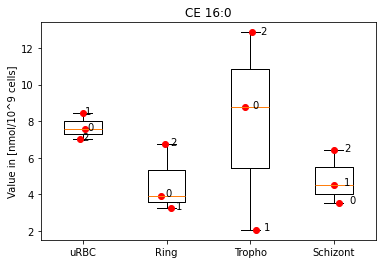

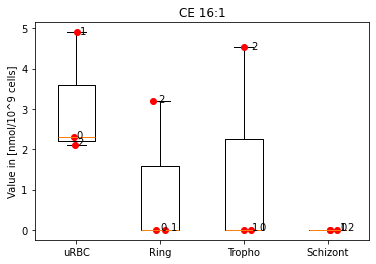

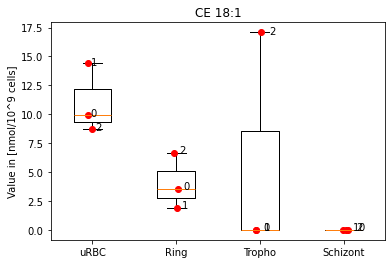

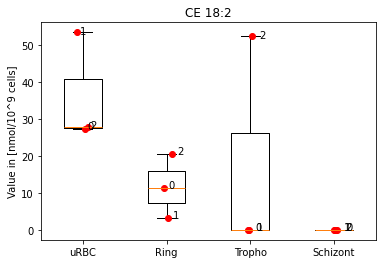

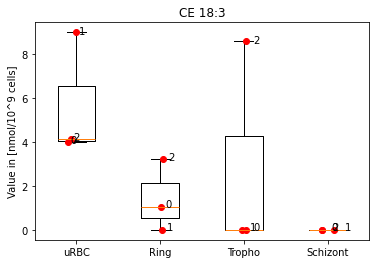

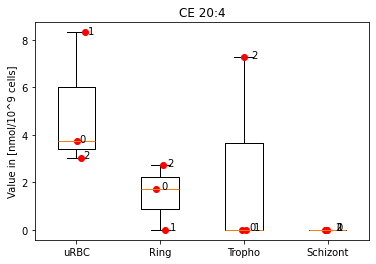

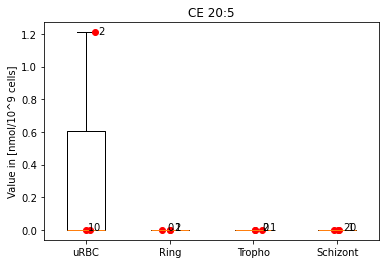

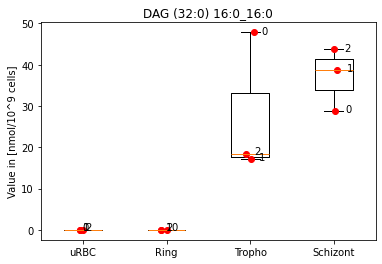

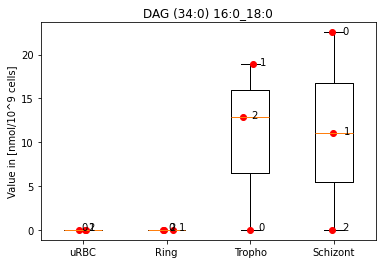

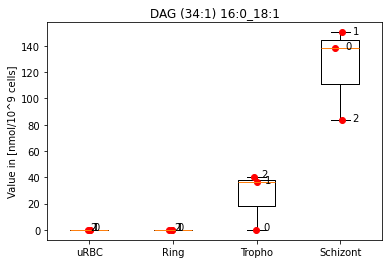

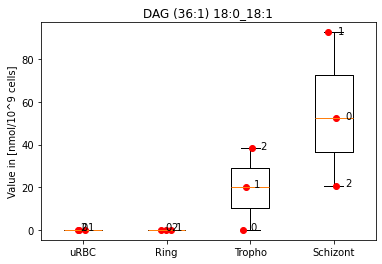

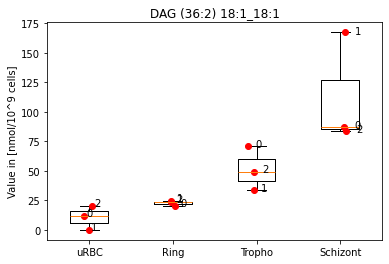

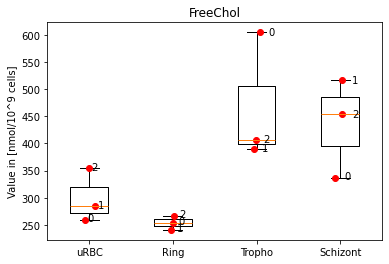

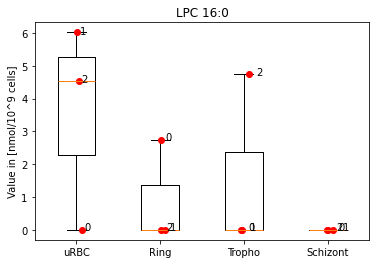

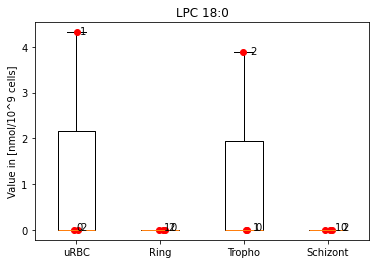

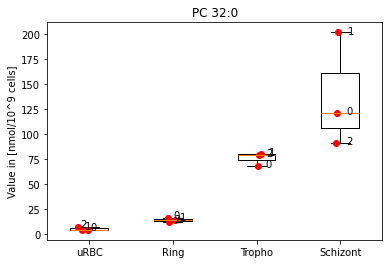

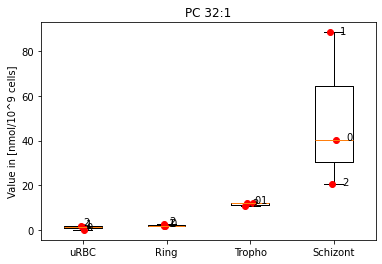

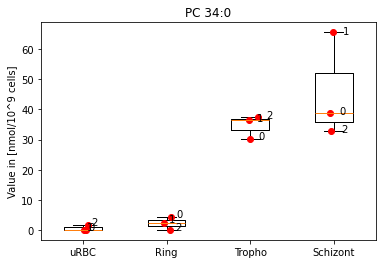

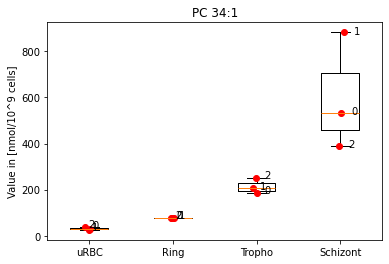

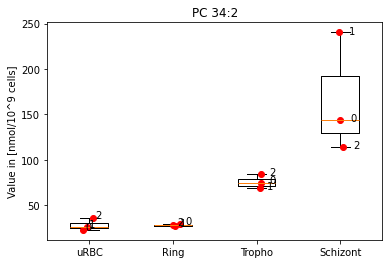

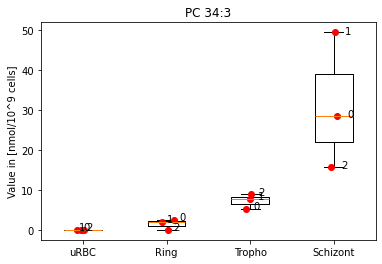

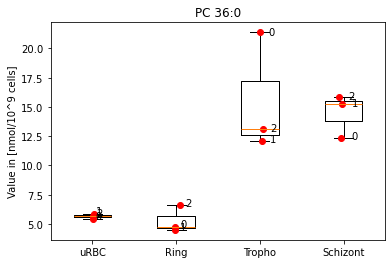

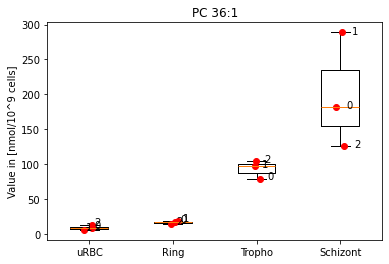

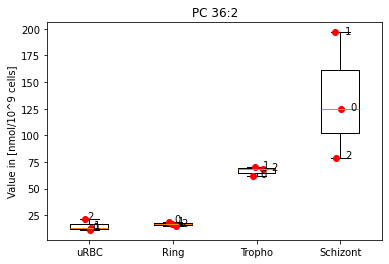

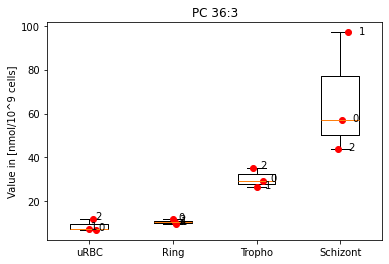

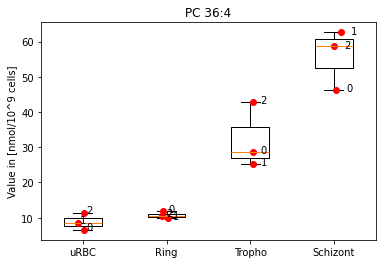

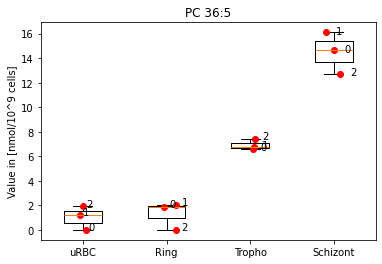

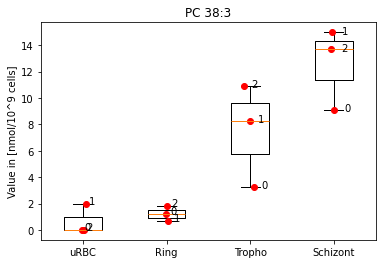

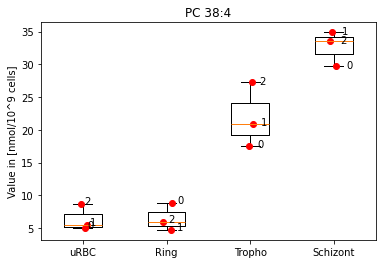

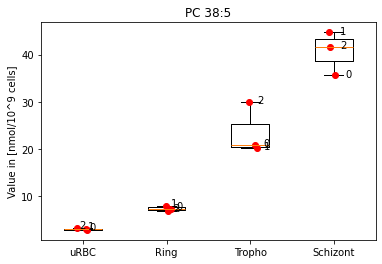

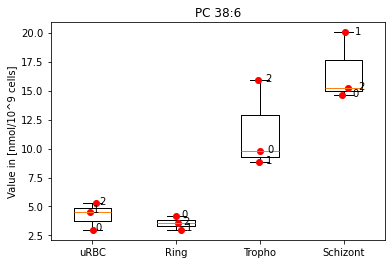

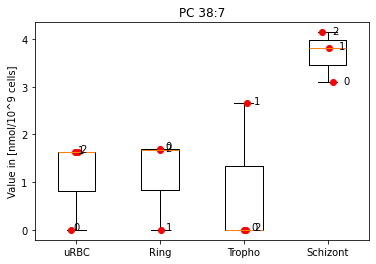

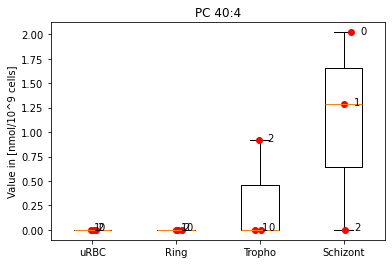

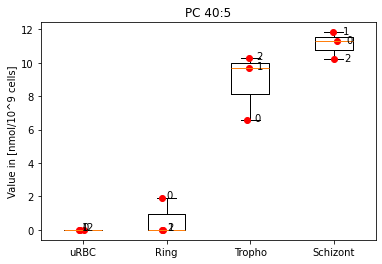

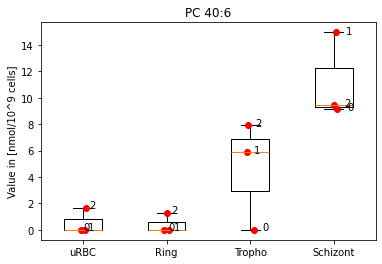

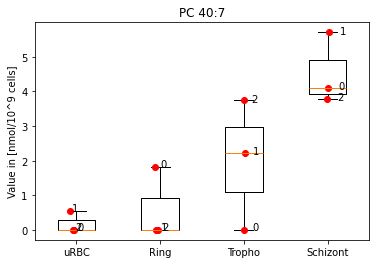

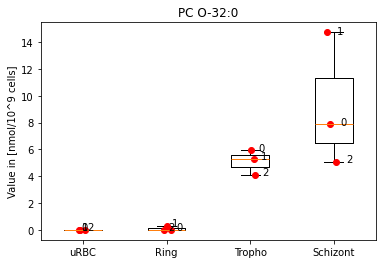

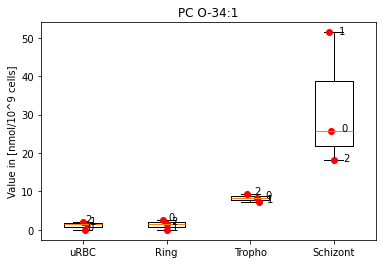

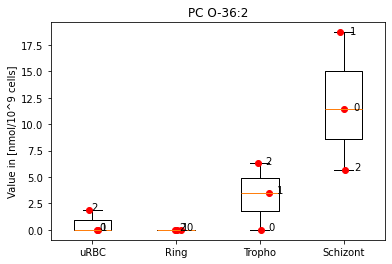

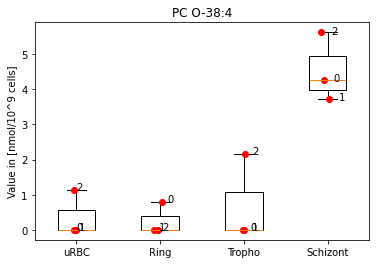

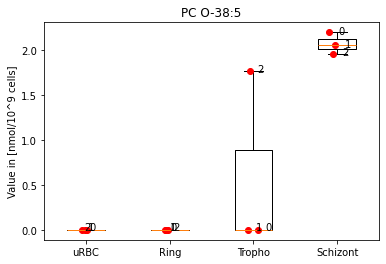

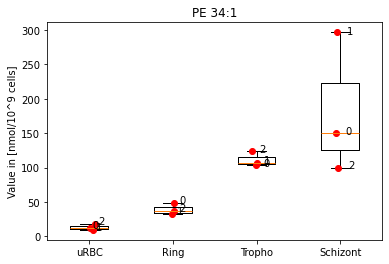

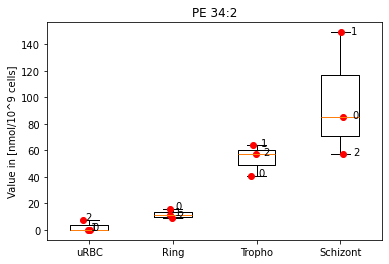

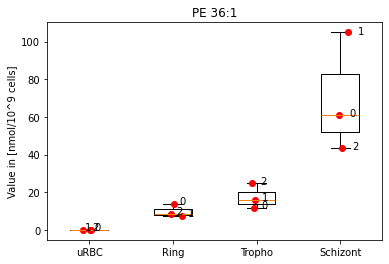

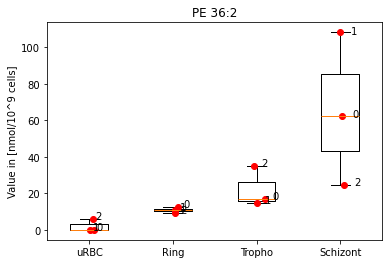

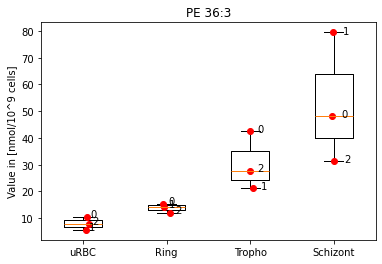

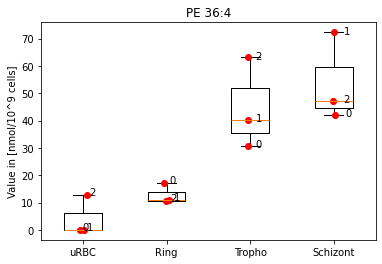

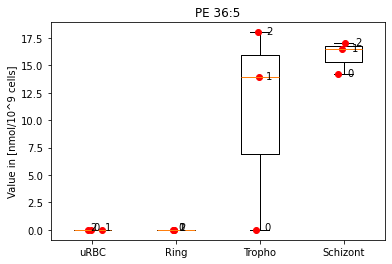

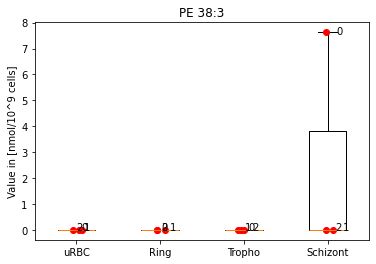

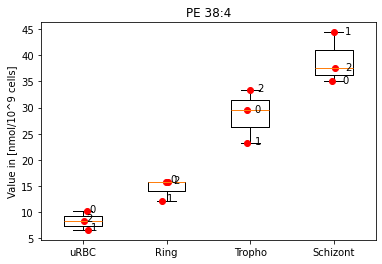

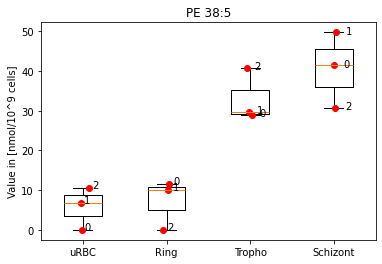

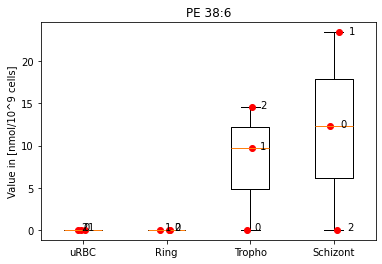

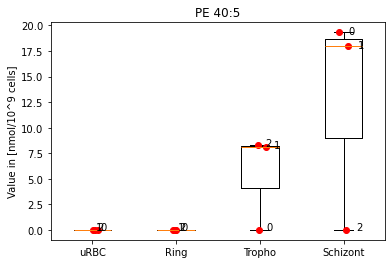

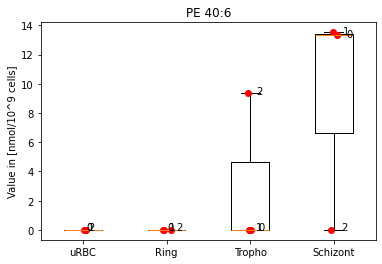

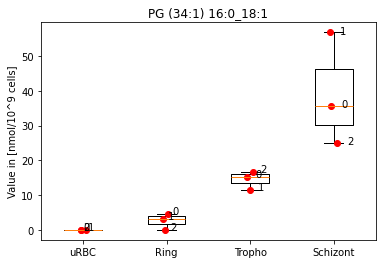

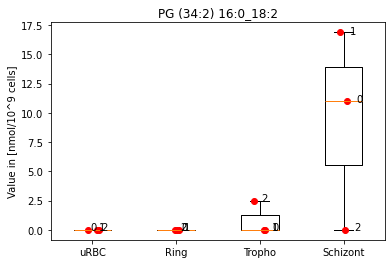

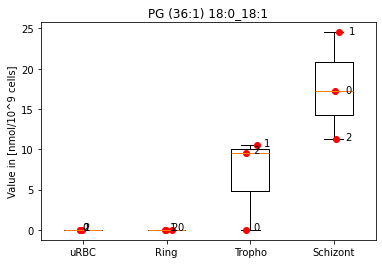

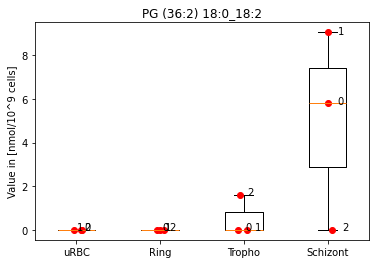

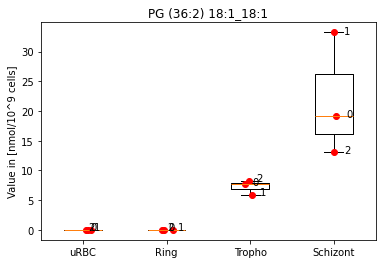

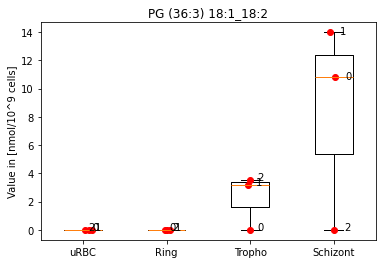

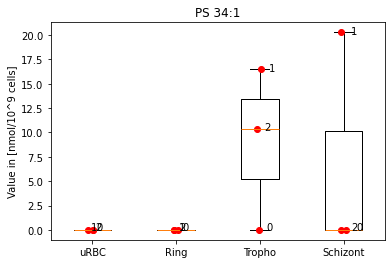

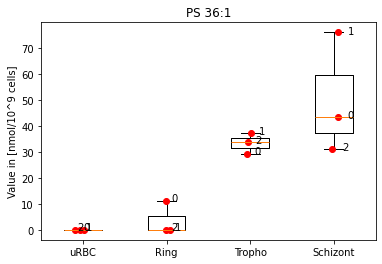

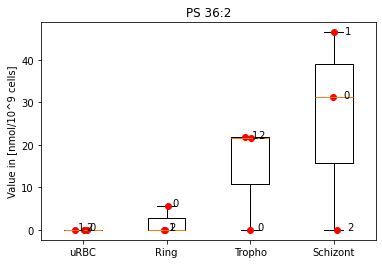

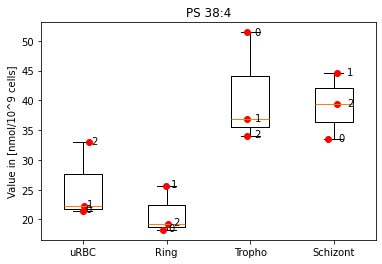

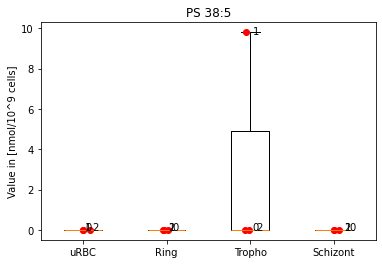

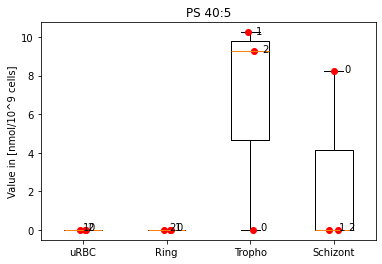

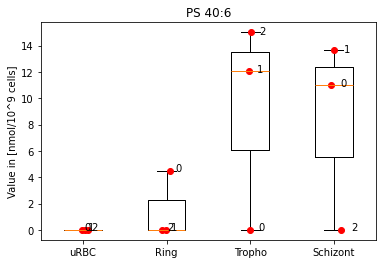

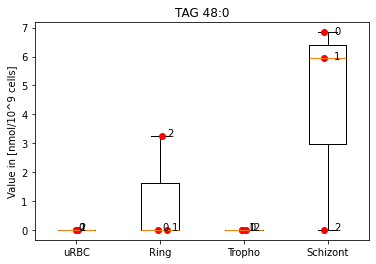

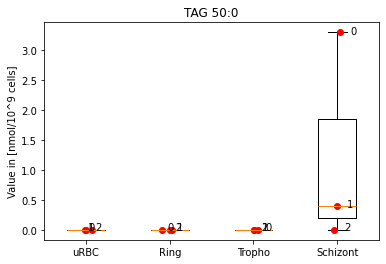

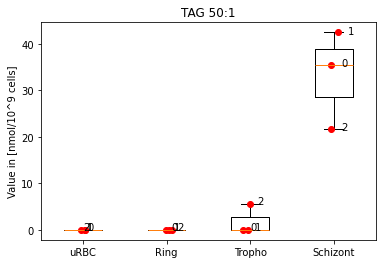

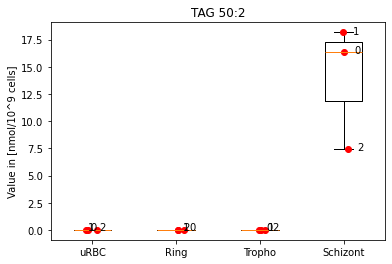

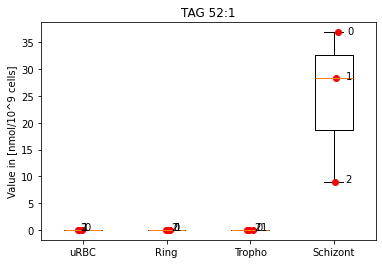

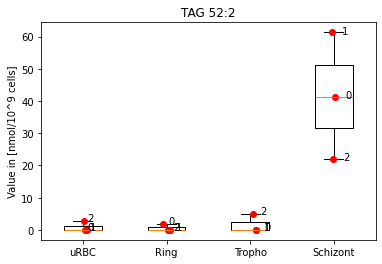

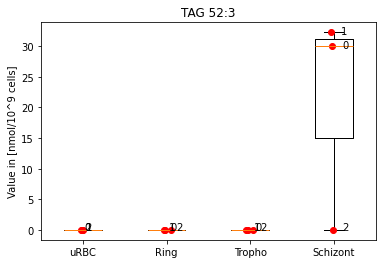

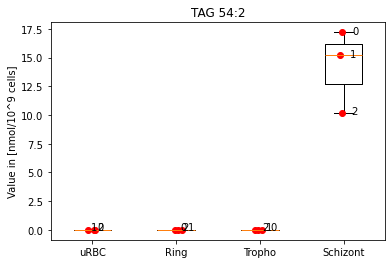

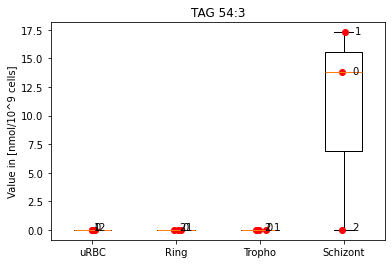

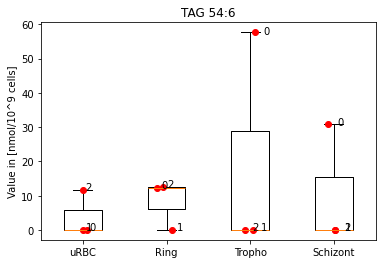

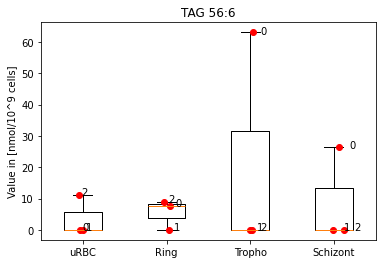

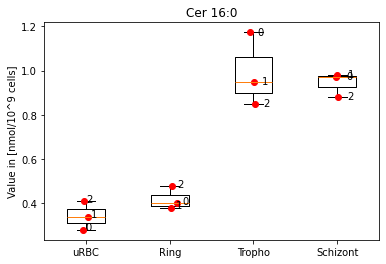

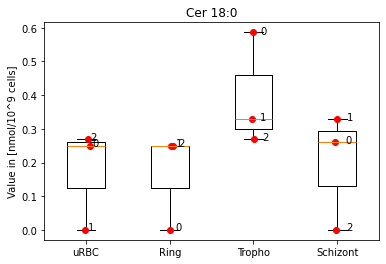

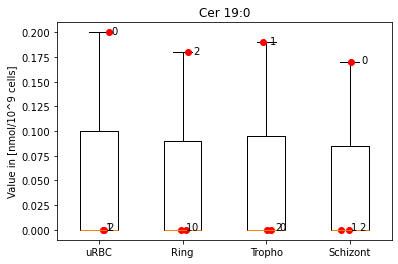

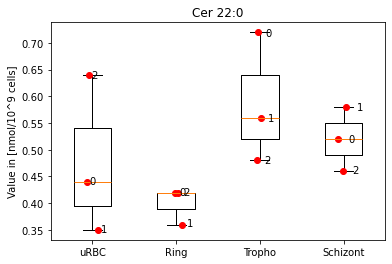

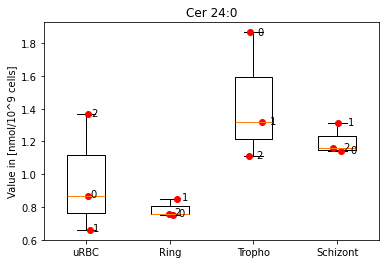

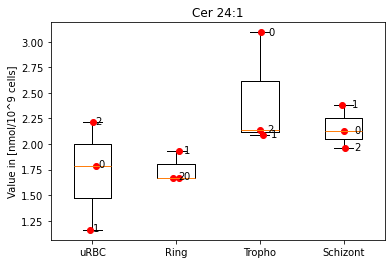

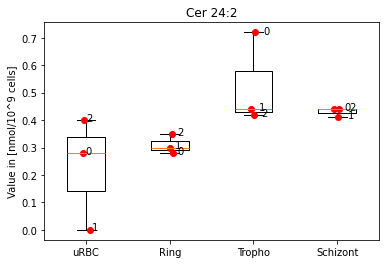

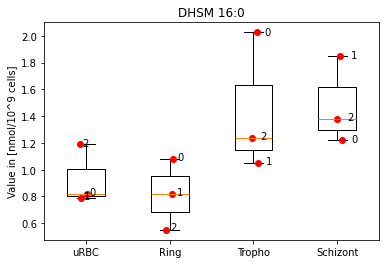

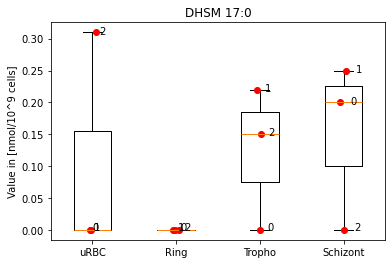

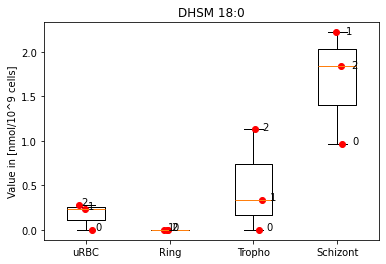

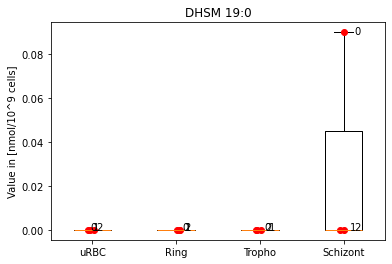

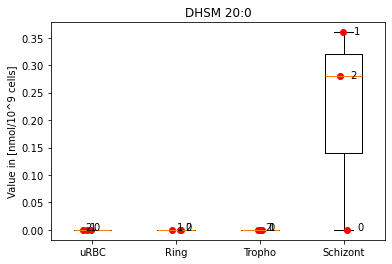

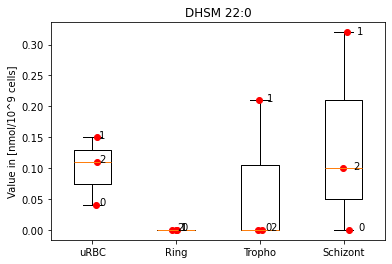

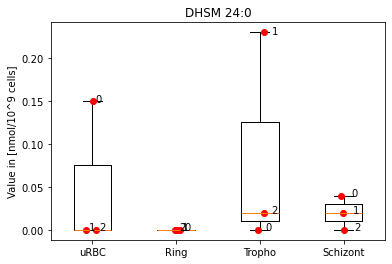

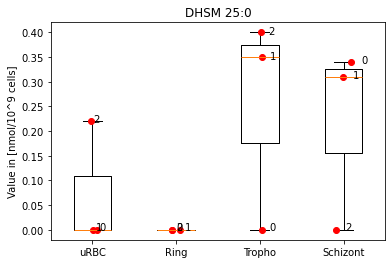

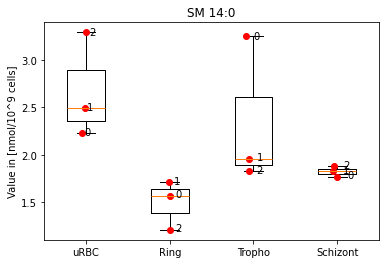

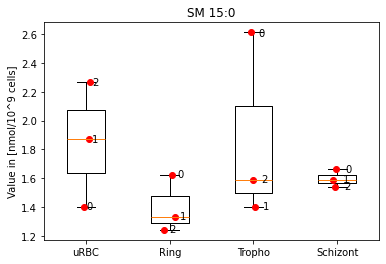

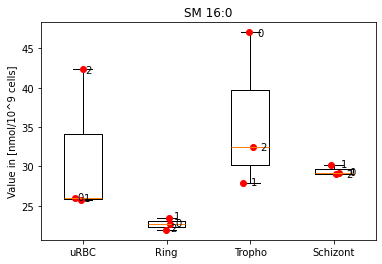

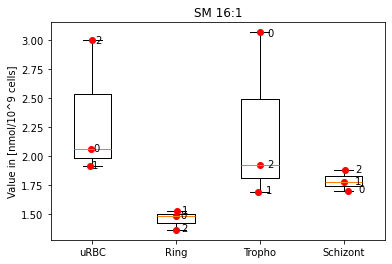

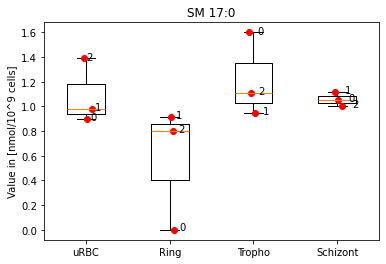

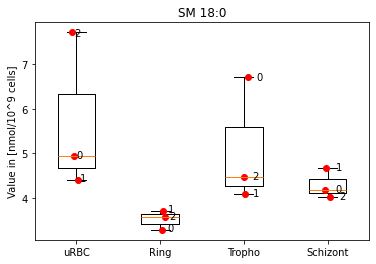

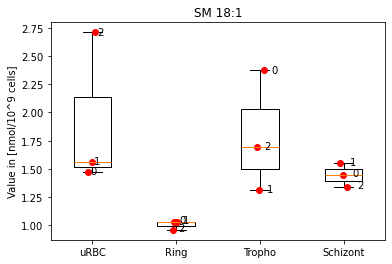

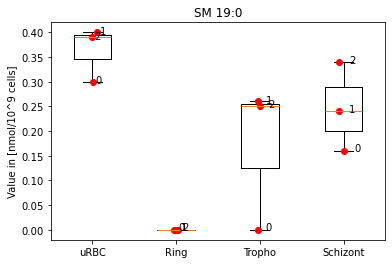

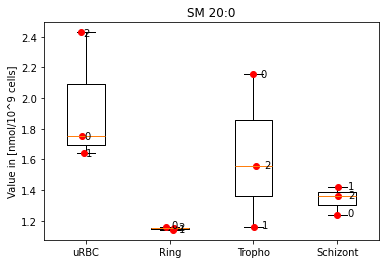

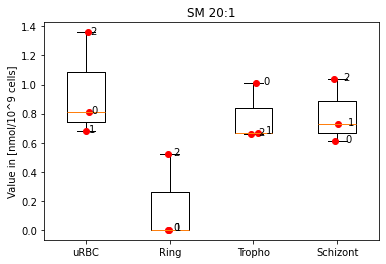

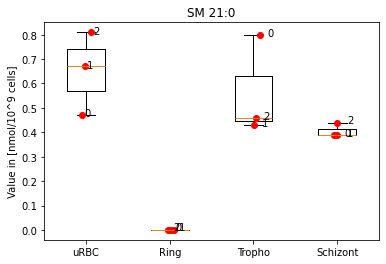

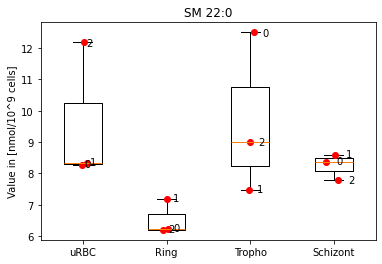

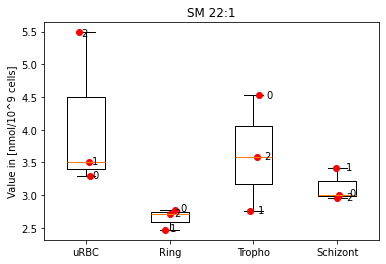

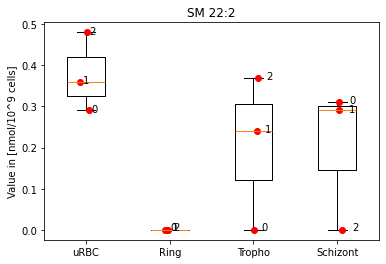

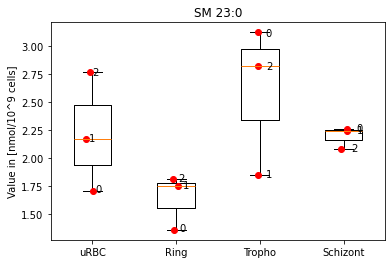

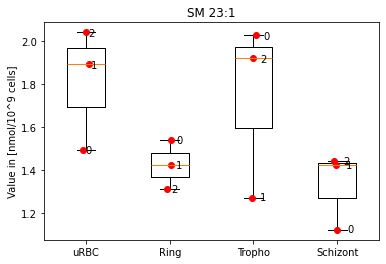

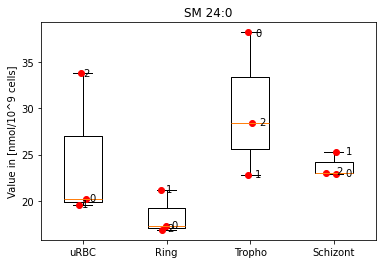

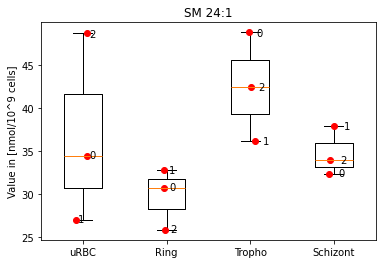

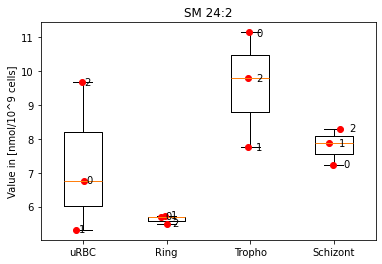

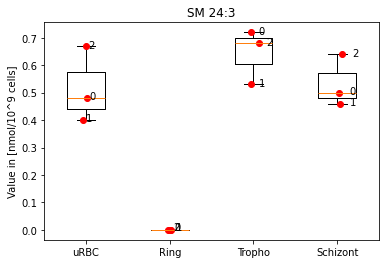

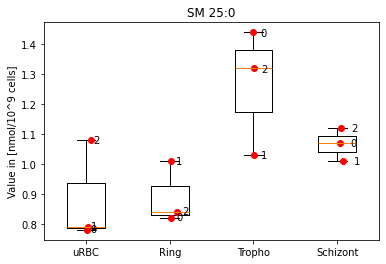

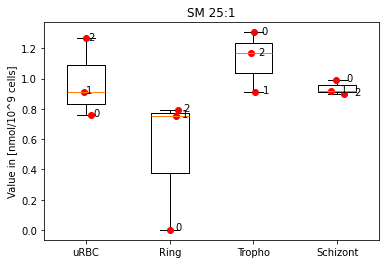

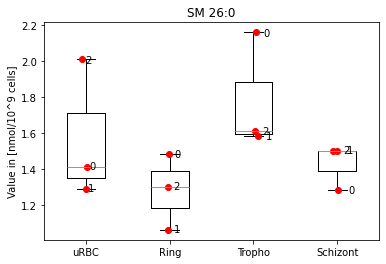

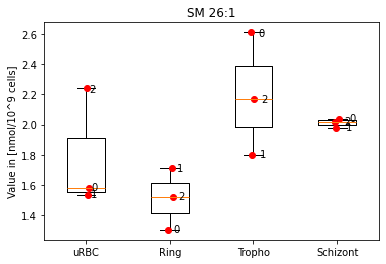

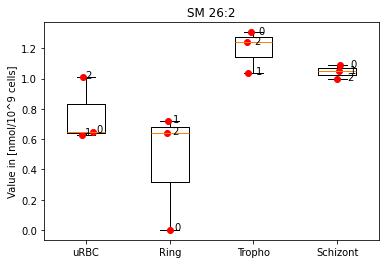

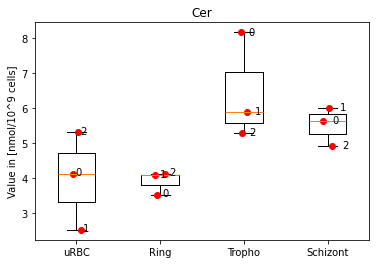

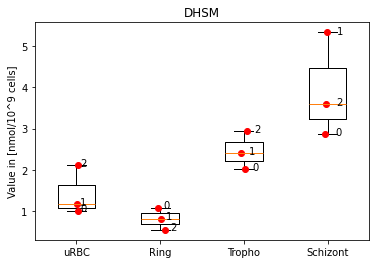

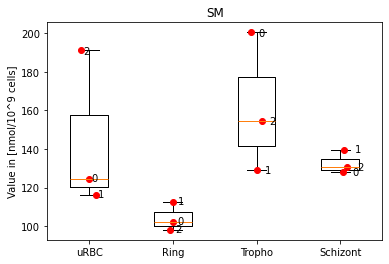

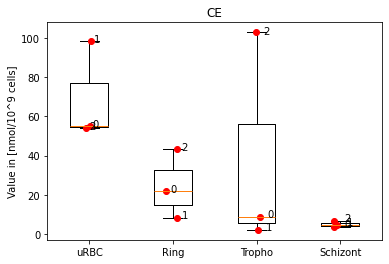

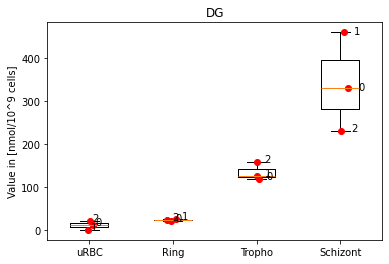

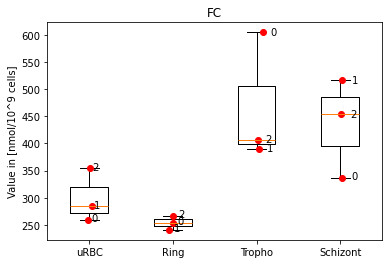

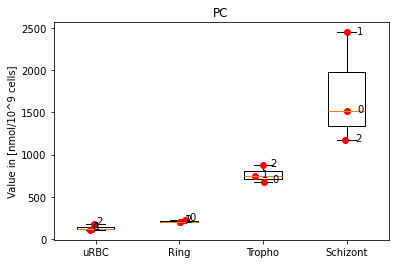

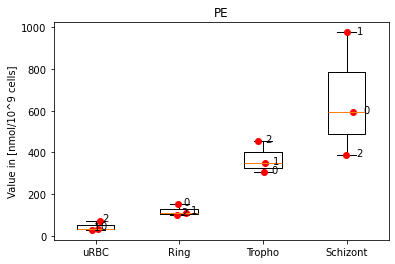

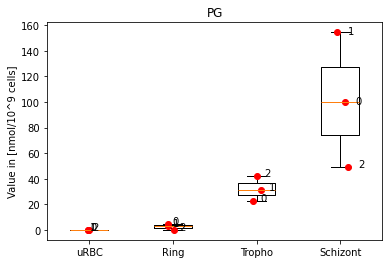

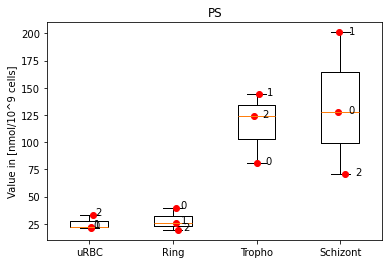

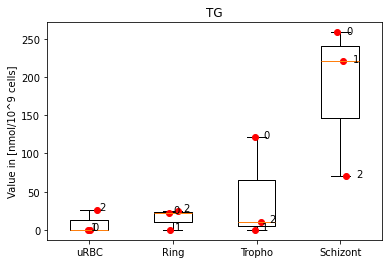

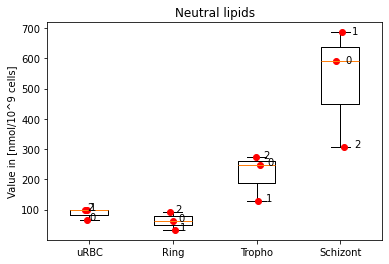

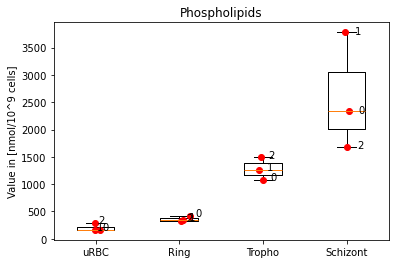

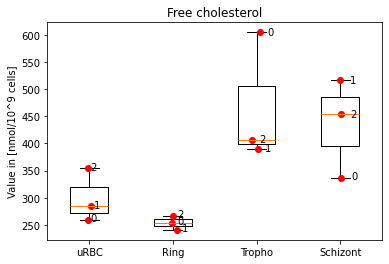

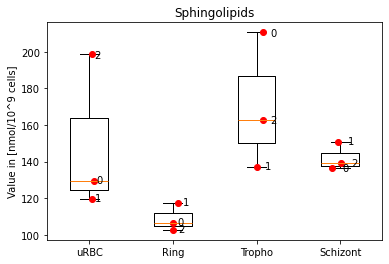

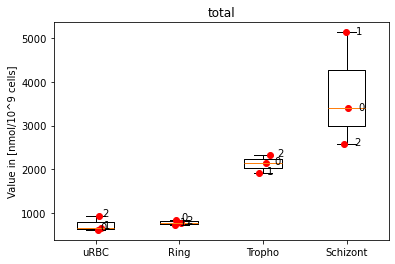

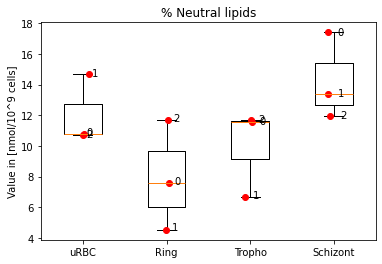

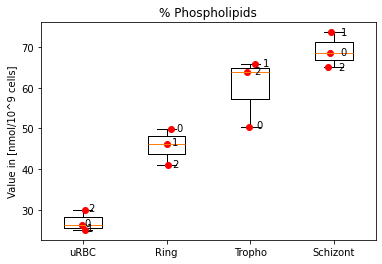

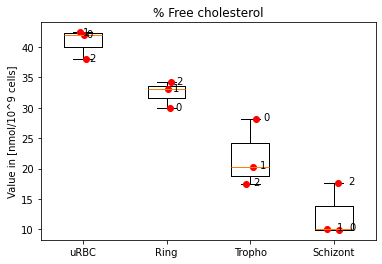

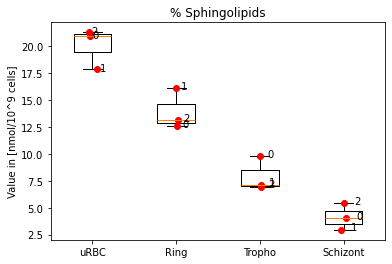

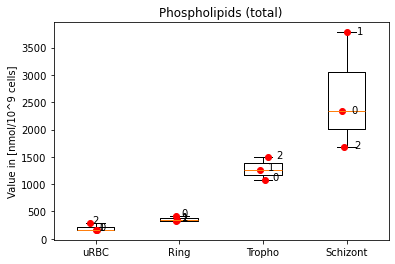

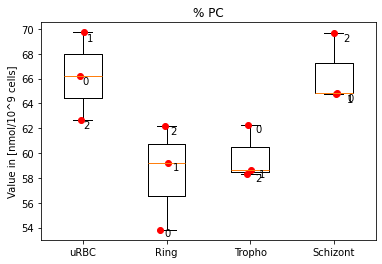

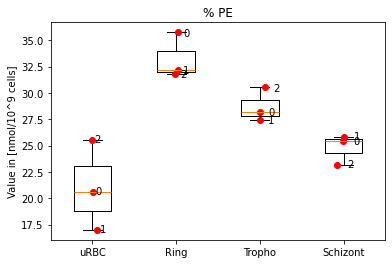

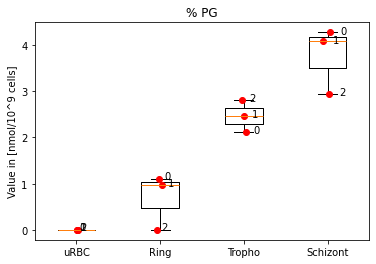

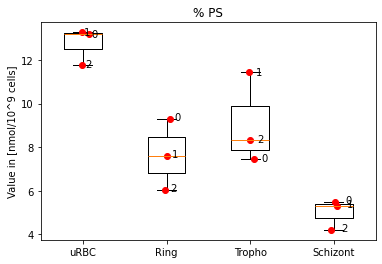

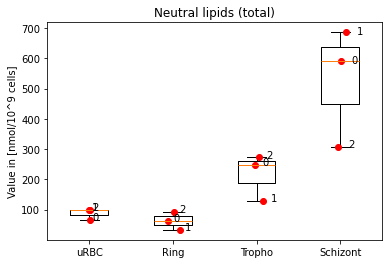

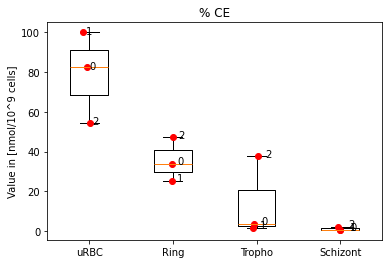

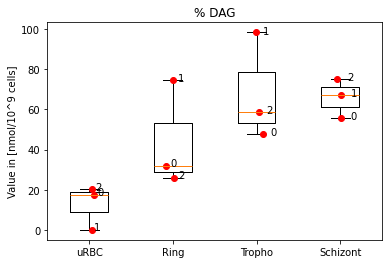

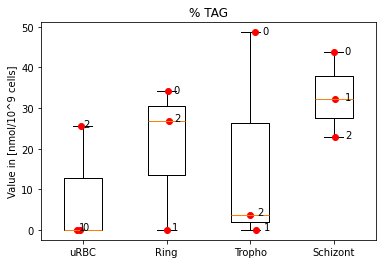

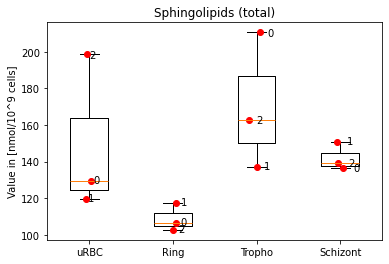

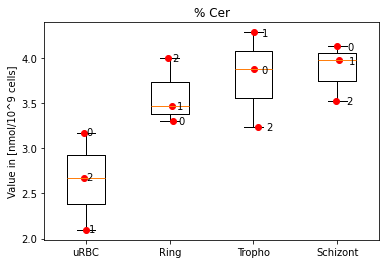

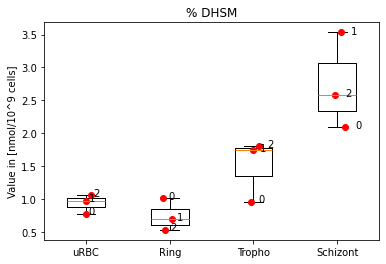

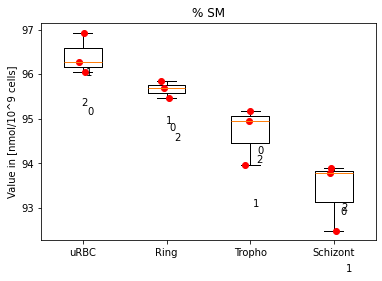

In [7]:
phases = ['uRBC','Ring','Tropho','Schizont']
fig, ax = plt.subplots()
for key in dic.keys():
    data = dic[key]
    #plot data of each metabolite values of each time point
    plt.boxplot(data)
    #make red dots and lable each data point
    for i in range(len(data)):
        y = data[i]
        # Add some random "jitter" to the x-axis
        x = np.random.normal(i+1, 0.04, size=len(y))
        _ = plt.plot(x, y, 'r.', alpha=1.0, markersize=12)
        
        for ids, txt in enumerate(y):
            _ = plt.text(x[ids]+0.03*x[ids], y[ids]-0.01*y[ids],ids)
        
    _ = plt.title(key)
    _ = plt.ylabel('Value in [nmol/10^9 cells]')
    _ = plt.xticks(np.arange(4)+1,('uRBC','Ring','Tropho','Schizont'))

    plt.show()
    plt.close()

Produce boxplot and scatter plot of every metabolite class in each phase

In [ ]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_alex.iloc[index_classes[step]:index_classes[step+1]].copy()
    # get each metabolite in class at every phase

    for i in range(4):
        phase = df.columns[i*3][:-1]
        data = df.iloc[:,i*3:i*3+3].T
        
        _ = data.boxplot()
        _ = plt.twinx()
        
        for i,x in enumerate(data.columns):
            y = data[x]
            # Add some random "jitter" to the x-axis
            x = np.random.normal(i+1, 0.04, size=len(y))
            _ = plt.plot(x, y, 'r.', alpha=1.0)
            
            for ids, txt in enumerate(y):
                _ = plt.text(x[ids]+0.03*x[ids], y[ids]-0.01*y[ids],ids)
        
        plt.xticks(rotation='vertical')
        plt.title(phase)
        plt.tight_layout()
        plt.show()
        plt.close()

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6826: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6827: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


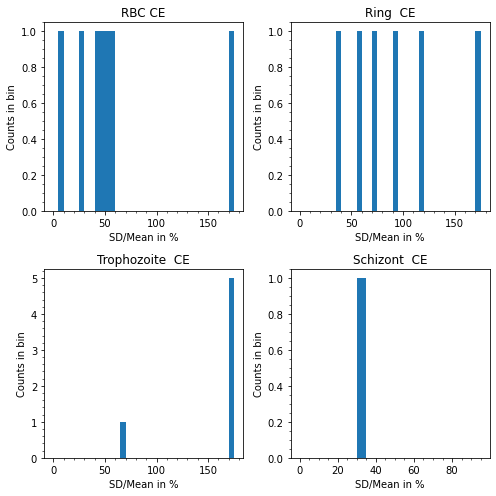

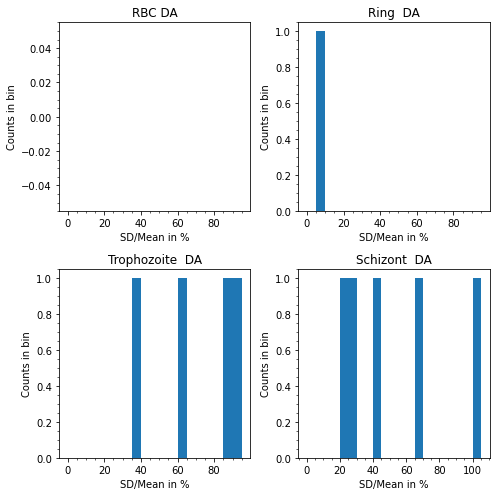

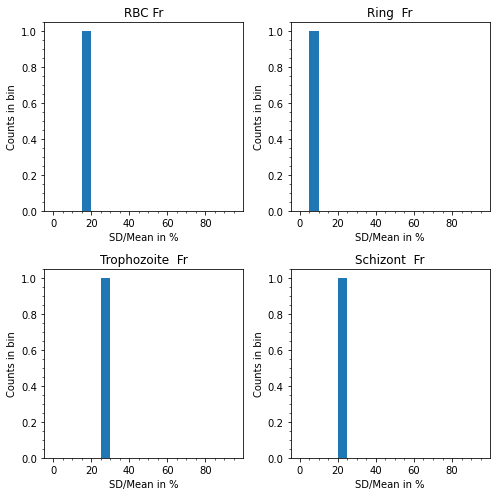

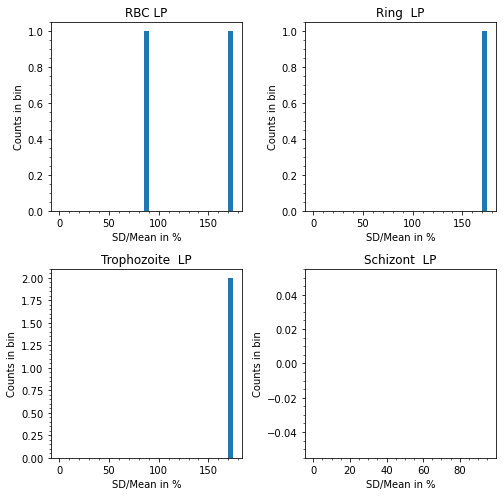

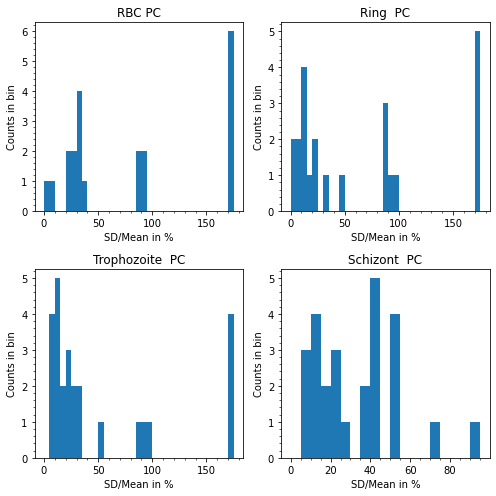

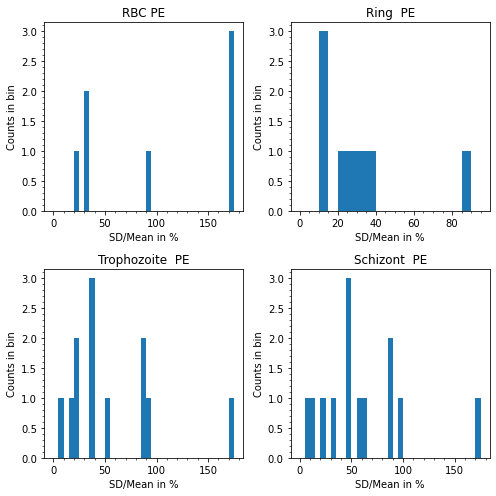

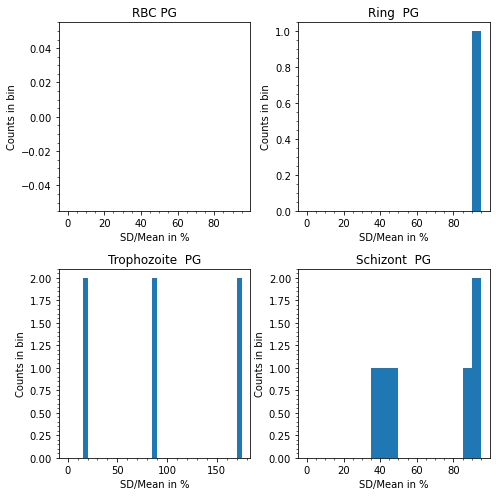

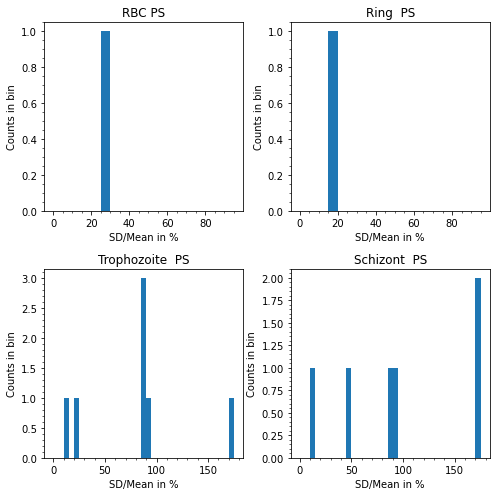

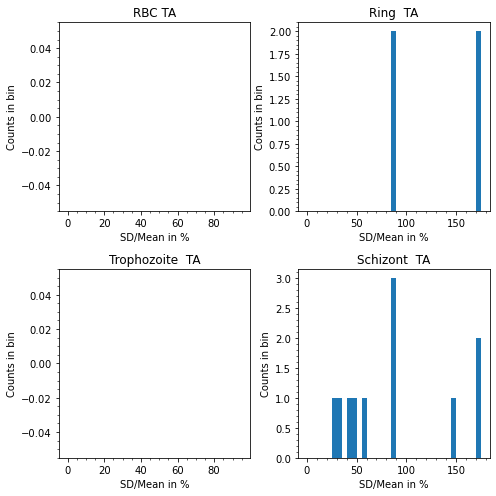

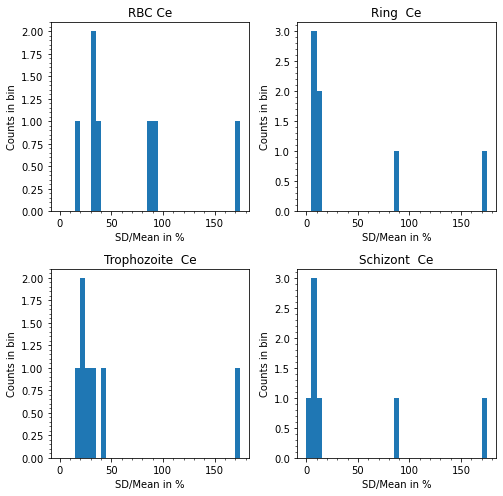

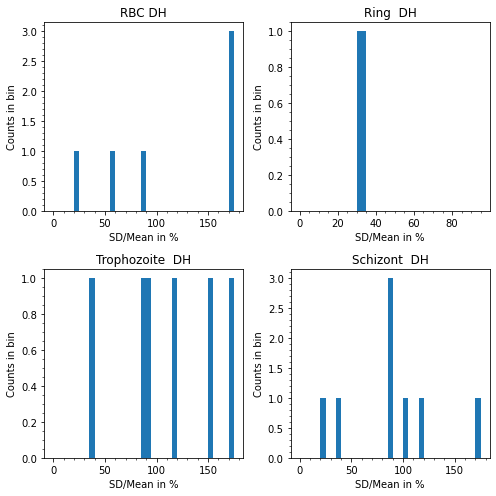

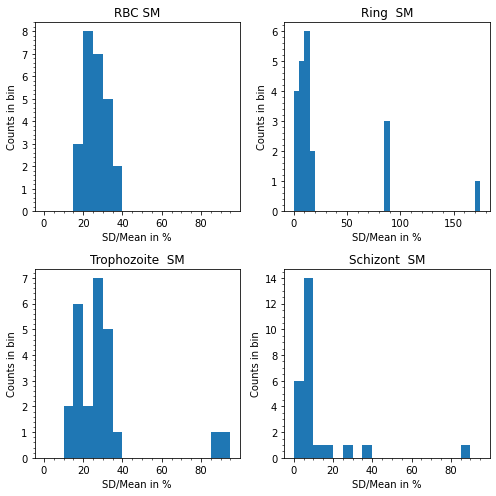

In [8]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_alex.iloc[index_classes[step]:index_classes[step+1]].copy()
    # get each metabolite in class at every phase
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
    
    for i in range(4):
        phase = df.columns[i*3][:-1]
        data = df.iloc[:,i*3:i*3+3].T
        
        maxium = 100
        if maxium < max(data.std()/data.mean()*100):
            maxium = max(data.std()/data.mean()*100+5)
        bins = np.arange(0,maxium,5)
        try:
            _ = axs.flat[i].hist(data.std()/data.mean()*100, bins=bins)
            _ = axs.flat[i].set_title(phase +' '+ data.columns[0][:2])
        except:pass
        
        _ = axs.flat[i].set_xlabel('SD/Mean in %')
        _ = axs.flat[i].set_ylabel('Counts in bin')
        _ = axs.flat[i].minorticks_on()
    fig.tight_layout()

In [ ]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_sns.iloc[index_classes[step]:index_classes[step+1]].copy()
    
    df2 = df.stack().reset_index()
    
    df2.columns = ['metabolite', 'Phase','value']
    
    tmp = []
    fig, ax = plt.subplots(figsize=(15,5))
    for i,x in enumerate(df2.Phase):
        df2.Phase.iloc[i]=x[:-1]
        tmp.append(x[-1:])
    df2['experiment']= tmp
    
    _ = sns.boxplot(x="metabolite", y="value",
                    hue="Phase", data=df2)
   
    
    _ = sns.stripplot(x="metabolite", y="value",
                      hue="Phase", data=df2, color='black', dodge=True)
    
    handles, labels = _.get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles[:-4], labels[0:-4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation='vertical')
    plt.show()
    plt.close()

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


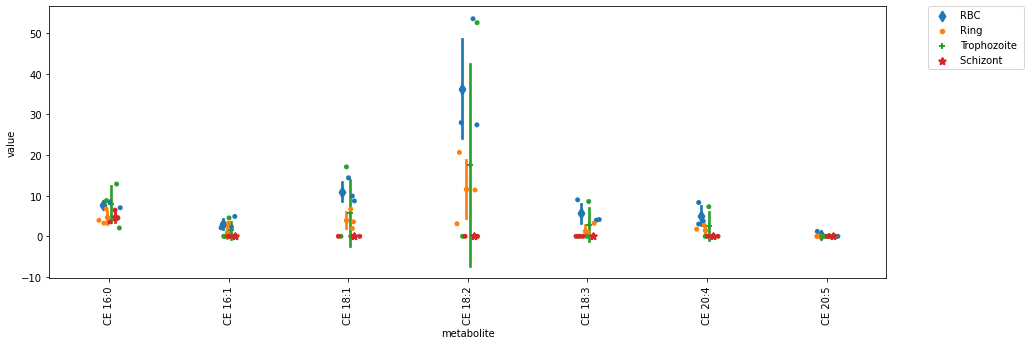

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


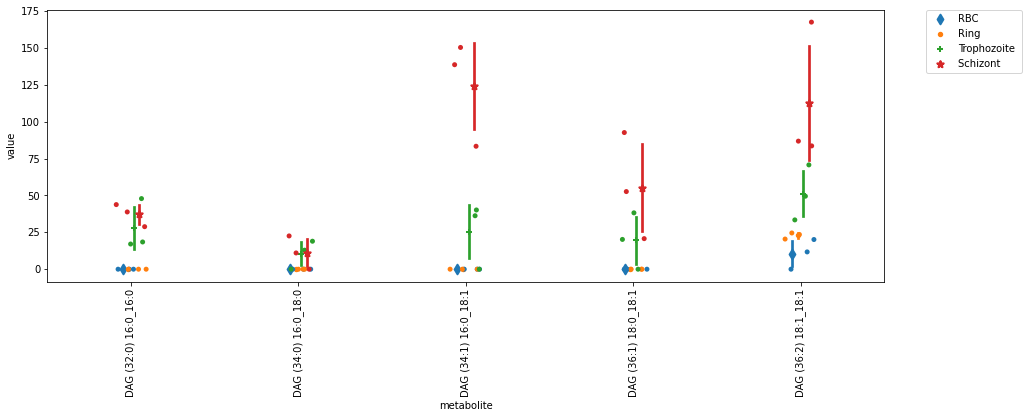

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


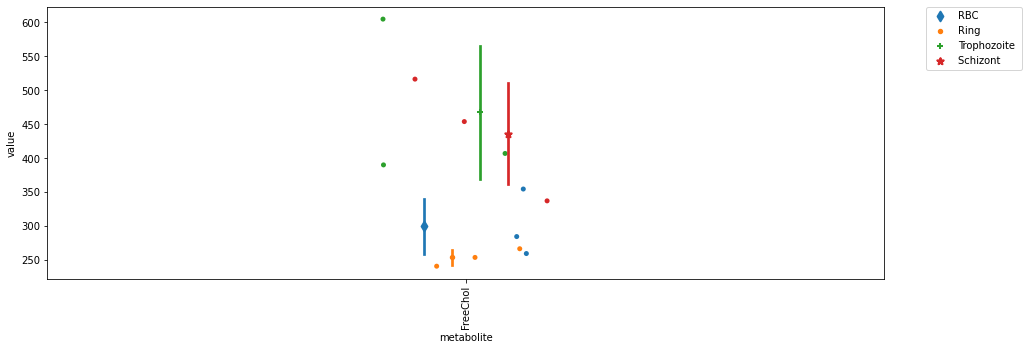

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


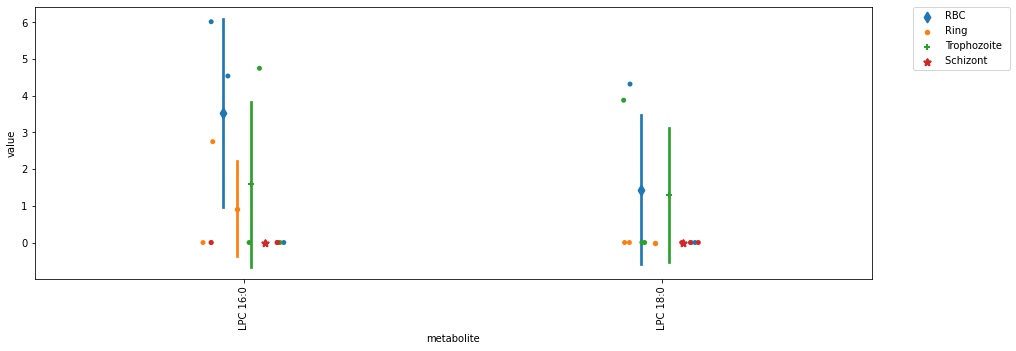

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


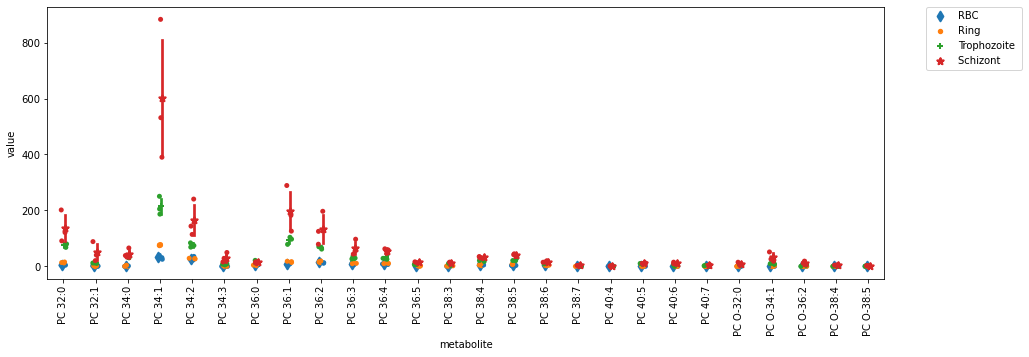

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


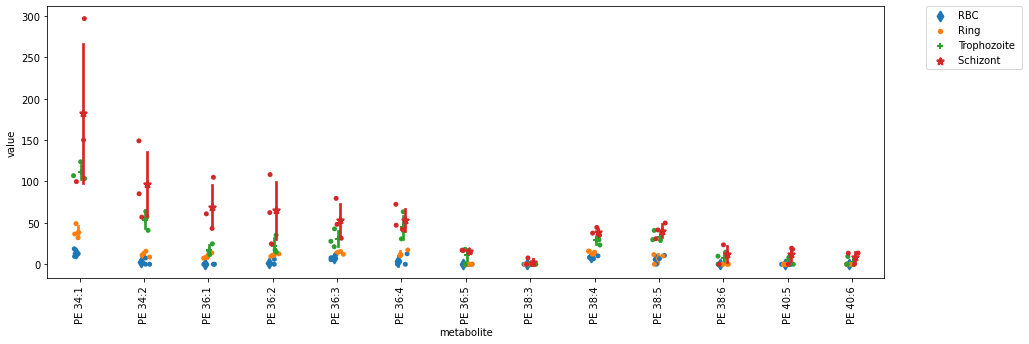

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


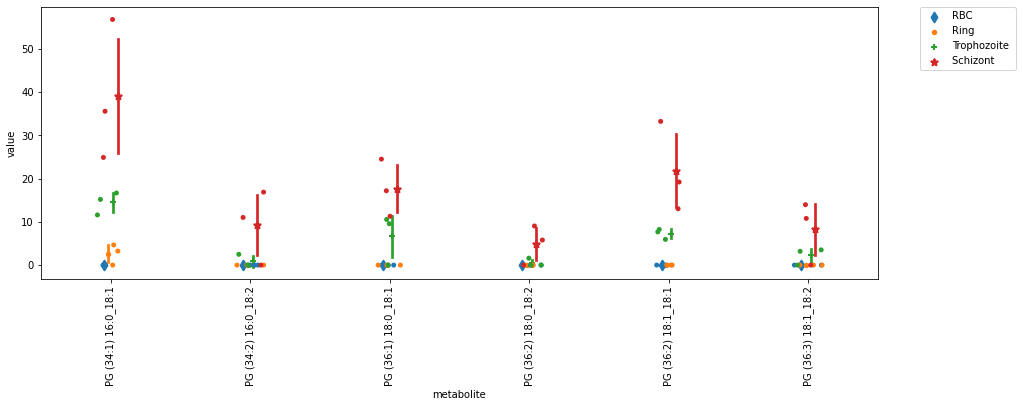

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


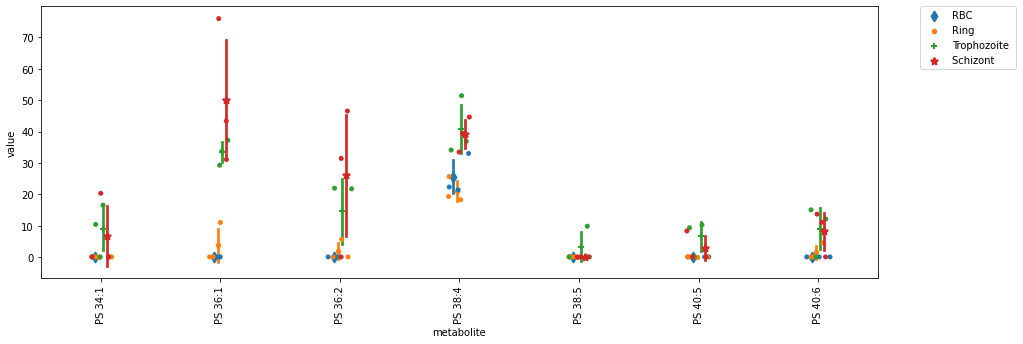

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


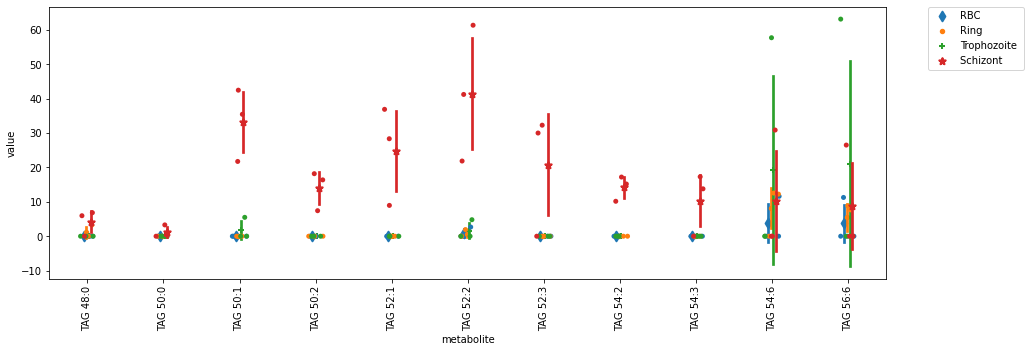

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


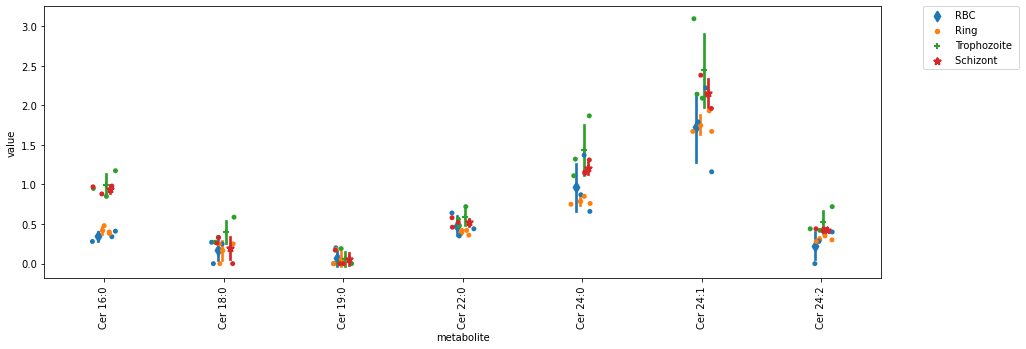

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


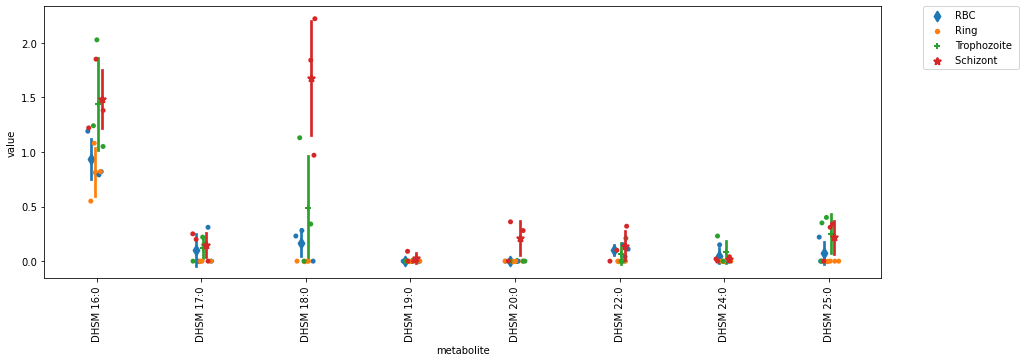

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/lib/python3/dist-packages/seaborn/categorical.py:1781: UserWarning: You passed a edgecolor/edgecolors ((0.17254901960784313, 0.6274509803921569, 0.17254901960784313)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


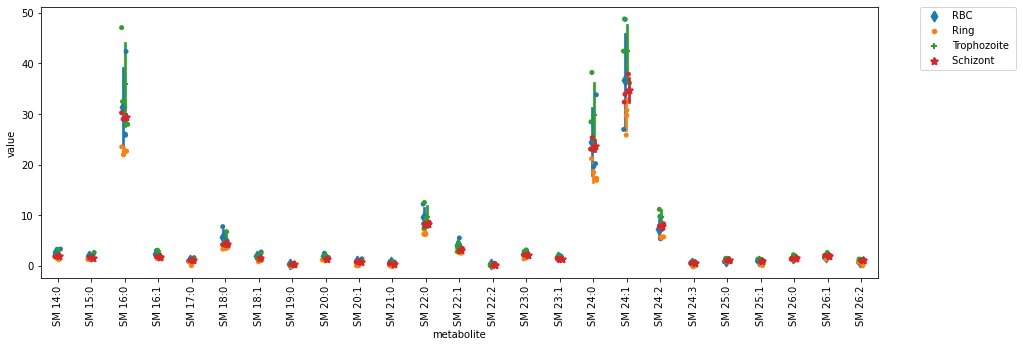

In [9]:
for step in range(len(index_classes)-1):
    if index_classes[step] == 118: 
        break
    df = df_sns.iloc[index_classes[step]:index_classes[step+1]].copy()
    
    df2 = df.stack().reset_index()
    df2.columns = ['metabolite', 'Phase','value']
    
    fig, ax = plt.subplots(figsize=(15,5))
    for i,x in enumerate(df2.Phase):
        df2.Phase.iloc[i]=x[:-1]
    
    _ = sns.pointplot(x="metabolite", y="value", hue="Phase", ci='sd',
                dodge=True, data=df2,
                linestyles=['','','',''],
               markers=['d','.','+','*'])
    _ = sns.stripplot(x="metabolite", y="value",
                      hue="Phase", data=df2)
    handles, labels = _.get_legend_handles_labels()

    # When creating the legend, only use the first two elements
    # to effectively remove the last two.
    l = plt.legend(handles[:-4], labels[0:-4], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xticks(rotation='vertical')
    plt.show()
    plt.close()

In [16]:
df_means

NameError: name 'df_means' is not defined

In [ ]:
CE = df_alex.iloc[index_classes[0]:index_classes[1]]
means = CE.iloc[:,-12:]
df_means = means.iloc[:,::3].stack().reset_index()
df_means.columns = ['metabolite', 'variable','value']

tmp = means.iloc[:,1::3].stack().reset_index()
tmp.columns = ['metabolite', 'std','val']
means = df_means.join(tmp, rsuffix='_other')
means = means.drop(columns=['metabolite_other','std'])
means.columns =['metabolite','timepoint','value','std_val']
means



In [ ]:
df2 = CE.iloc[:,:-8].stack().reset_index()

df2.columns = ['metabolite', 'variable','value']
for i,x in enumerate(df2.variable):
    df2.variable.iloc[i]=x[:-1]

df2

In [ ]:
_ = sns.catplot(x="metabolite", y="value", hue="variable", ci='sd',
                dodge=0.4, data=df2, kind='point',
                linestyles=['','','',''],
               markers=['d','.','+','*'])


In [ ]:
# get each metabolite class in every phase
for i in range(4):
    print(CE.columns[i*3][:-1])
    data = CE.iloc[:,i*3:i*3+3]
    _ = data.boxplot()
    for i,x in enumerate(data.columns):
        y = data[x]
        # Add some random "jitter" to the x-axis
        x = np.random.normal(i+1, 0.04, size=len(y))
        _ = plt.plot(x, y, 'r.', alpha=1.0)
       
    plt.show()

In [ ]:
# to get each experiment
for i in range(3):
    data = CE.iloc[:,i::3]
    _ = data.boxplot()
    for i,x in enumerate(data.columns):
            y = data[x]
            # Add some random "jitter" to the x-axis
            x = np.random.normal(i+1, 0.04, size=len(y))
            plt.plot(x, y, 'r.', alpha=1.0)
    
    plt.show()


## SLIMEr for Alex Maier Data-set

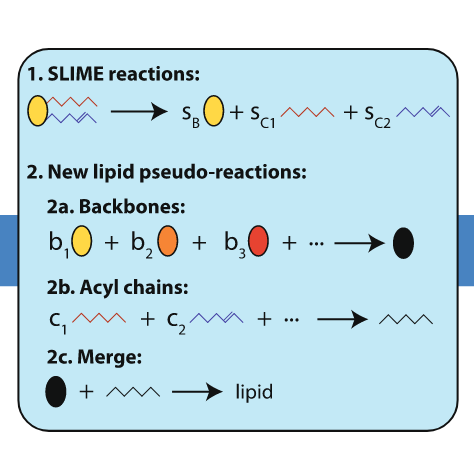

In [6]:
df_alex.columns

Index(['Unnamed: 0', 'RBC1', 'RBC2', 'RBC3', 'Ring 1', 'Ring 2', 'Ring 3',
       'Trophozoite 1', 'Trophozoite 2', 'Trophozoite 3', 'Schizont 1',
       'Schizont 2', 'Schizont 3', 'mean_Unnamed: ', 'std_Unnamed: ',
       'coeff_varUnnamed: ', 'mean_RBC', 'std_RBC', 'coeff_varRBC',
       'mean_Ring ', 'std_Ring ', 'coeff_varRing ', 'mean_Trophozoite ',
       'std_Trophozoite ', 'coeff_varTrophozoite '],
      dtype='object')

Calculation of data unit into FBA unit $[\frac{nmol}{10^9 cells}]\rightarrow [\frac{mmol}{gDW_P}]$

In [ ]:
weight_per_cell = 10.5*1e-12
cell_num = 1e9
nano_to_milli = 1e-6

alex_factor = nano_to_milli/cell_num/weight_per_cell
print(alex_factor)

### Dry weight consideration: 
Estimating dry weight by volume growth as scaling factor

In [ ]:
Vmax = 50
Vmin = 4
t = np.arange(0,180000,10)

u_time = 2 * 3600
ring_time = 8 * 3600
troph_time = 30 * 3600
schiz_time = 48 * 3600
measure_points = [u_time, ring_time, troph_time, schiz_time]
# find most similar timepoint in t to measure_points
can = []
for item in measure_points:  
    can.append(np.abs(t - item).argmin())
t12 = 92200
s = 7200
cytoplasm = ((Vmax-Vmin)*1/(1+np.exp((t12-t)/s))+Vmin)
weight_stage = weight_per_cell*cytoplasm/Vmax
print(weight_stage[can])
plt.plot(t, weight_stage)
plt.ylabel('Mass in [g]')
plt.xlabel('Time in [s]')
plt.show()

Dry mass following the volume curve

In [ ]:
DW_max = weight_per_cell
# As one merozoite infectes the cell and mutiplies ~23 times
DW_min = weight_per_cell/23 

t = np.arange(0,180000,10)

u_time = 0 * 3600
ring_time = 8 * 3600
troph_time = 30 * 3600
schiz_time = 48 * 3600
measure_points = [u_time, ring_time, troph_time, schiz_time]
# find most similar timepoint in t to measure_points
can = []
for item in measure_points:  
    can.append(np.abs(t - item).argmin())
t12 = 92200
s = 7200
DW_array = ((DW_max-DW_min)*1/(1+np.exp((t12-t)/s))+DW_min)

print(DW_array[can])
plt.plot(t, DW_array)
plt.ylabel('Mass in [g]')
plt.xlabel('Time in [s]')
plt.show()

Dry mass to volume relationship from ecology 2019 [paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6606879/) or [1987](https://www.jstor.org/stable/pdf/4250911.pdf?refreqid=excelsior%3Ad630090024a08f9f505aa87fd0cae887&ab_segments=&origin=&initiator=&acceptTC=1)

In [ ]:
mass_new = 322*1e-3*(cytoplasm**0.43)
mass_old = 0.162*(cytoplasm**0.91)

plt.plot(t, np.array([mass_new,mass_old]).T)
plt.legend(['2019','1987'])
plt.xlabel('Time in [s]')
plt.ylabel('Mass in [pg]')
plt.show()

In [ ]:
plt.plot(t/3600, np.array([weight_stage*1e12, DW_array*1e12, mass_new, mass_old]).T)
plt.scatter(np.asarray(measure_points)/3600,DW_array[can]*1e12)
plt.scatter(schiz_time/3600,weight_per_cell*1e12)

plt.legend(['V scaling','Curve', 'Eco2019','Eco1987','FBA_points','Mass_exp'])
plt.xlabel('Time in [h]')
plt.ylabel('Mass in [pg]')
plt.show()

Difference between estimation options

In [ ]:
difference = (weight_stage-DW_array)**2/(weight_stage)**2
plt.scatter(t[::1000], difference[::1000]*100)
plt.ylabel('Massdifference in %')
plt.xlabel('Time in [s]')
plt.show()

### Linear growth rate assumption
The biomass growth of this parasite is not easily estimatable since it does not scale with the volume, in the beginning it builds maurer's cleft and in the end the merozoites are built but the volume does not grow after trophozoite stage, so biomass increases drastically but no volume changes.

For this reason the simplification of linear biomass growth is introduced, because what is know that one merozoite infectes a RBC and in the end roughly 24 merozoites are released during RBC rapture, thus this biosmass growth happens as a fact.

In [ ]:
n = weight_per_cell/24
m = weight_per_cell/t[-1]
y = m * t + n
print(y[can])
# plot different estimation graphs
plt.plot(t/3600, np.array([weight_stage*1e12, DW_array*1e12, mass_new, mass_old, y*1e12]).T)
# plot vertical lines for the time points considered for FBA
plt.vlines(np.asarray(measure_points)/3600, ymin=0, ymax=11, colors='black',ls='dashdot')
# plot known mass of the parasite
plt.scatter(schiz_time/3600,weight_per_cell*1e12)

plt.legend(['V scaling','Curve', 'Eco2019','Eco1987','Linear','FBA_points','Mass_exp'])
plt.xlabel('Time in [h]')
plt.ylabel('Mass in [pg]')
plt.show()

### SLIMEr for Alex Maier Data-set


Stage dependent cell dry weight factor for unit conversion

In [ ]:
y

In [ ]:
weight_per_cell = 10.5*1e-12
cell_num = 1e9
nano_to_milli = 1e-6

stage_factor_vec = nano_to_milli/cell_num/y[can]
stage_factor_vec

Part 1 of SLIMEr -> existing data set lipids split into head group and side chain

In [12]:
def SLIMEr_writer(name:str) -> str:
    edukt = name
    name = name.replace('(','').replace(')','')
    name = name.replace('_', ' ')
    name = name.replace(' ',' + 1 ')
    product = '1 '+ name
    return edukt +  ' -> ' + product

In [13]:
df_alex['SLIMEr'] = df_alex.index.map(SLIMEr_writer) 
df_alex['SLIMEr']

Unnamed: 0
CE 16:0                                            CE 16:0 -> 1 CE + 1 16:0
CE 16:1                                            CE 16:1 -> 1 CE + 1 16:1
CE 18:1                                            CE 18:1 -> 1 CE + 1 18:1
CE 18:2                                            CE 18:2 -> 1 CE + 1 18:2
CE 18:3                                            CE 18:3 -> 1 CE + 1 18:3
CE 20:4                                            CE 20:4 -> 1 CE + 1 20:4
CE 20:5                                            CE 20:5 -> 1 CE + 1 20:5
DAG (32:0) 16:0_16:0      DAG (32:0) 16:0_16:0 -> 1 DAG + 1 32:0 + 1 16:...
DAG (34:0) 16:0_18:0      DAG (34:0) 16:0_18:0 -> 1 DAG + 1 34:0 + 1 16:...
DAG (34:1) 16:0_18:1      DAG (34:1) 16:0_18:1 -> 1 DAG + 1 34:1 + 1 16:...
DAG (36:1) 18:0_18:1      DAG (36:1) 18:0_18:1 -> 1 DAG + 1 36:1 + 1 18:...
DAG (36:2) 18:1_18:1      DAG (36:2) 18:1_18:1 -> 1 DAG + 1 36:2 + 1 18:...
FreeChol                                             FreeChol -> 1 FreeChol
L

### Produce DataFrames for each **head** group and calculate its mean mass per stage, can be used for the backbone part of SLIMEr (2a) or $S_B$

Build head group dic with sum of each head group and stage times conversion factor specific to their biomass at that stage

In [22]:
head_group_dic = {}
# Loop to go separately through all the different lipid head group classes
for step in range(len(index_classes)):
    if index_classes[step] == 118: 
        break
    # get slice with only specific headgroup 
    df = df_alex.iloc[index_classes[step]:index_classes[step+1]].copy()
    # get slice with mean, std, covariance calculation
    #analysis_df_part = df.iloc[:,-:]
    # slice with only the mean value calculation
    df_means = df[['mean_RBC','mean_Ring ','mean_Trophozoite ','mean_Schizont ']].T
    # get total mean mass of head group per stage
    col_sum = df_means.sum(axis=1)
    head_group_dic[head_group_nme[step]] = col_sum
    # calculation of contribution of each specific lipid to its head group
    df_means = df_means.apply(lambda x: x/col_sum)
    df_means['Sum nmol']= col_sum
    print(df_means)

Unnamed: 0          CE 16:0   CE 16:1   CE 18:1   CE 18:2   CE 18:3   CE 20:4  \
mean_RBC           0.111116  0.044803  0.159047  0.524254  0.082291  0.072666   
mean_Ring          0.190626  0.043591  0.166576  0.480186  0.058076  0.060946   
mean_Trophozoite   0.208509  0.039821  0.150229  0.462025  0.075334  0.064082   
mean_Schizont      1.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

Unnamed: 0          CE 20:5   Sum nmol  
mean_RBC           0.005823  69.266667  
mean_Ring          0.000000  24.393333  
mean_Trophozoite   0.000000  37.920000  
mean_Schizont      0.000000   4.833333  
Unnamed: 0         DAG (32:0) 16:0_16:0  DAG (34:0) 16:0_18:0  \
mean_RBC                       0.000000              0.000000   
mean_Ring                      0.000000              0.000000   
mean_Trophozoite               0.206558              0.078945   
mean_Schizont                  0.109113              0.032869   

Unnamed: 0         DAG (34:1) 16:0_18:1  DAG (36:1) 18:0_18:1  

### Head group print out

In [24]:
# Produce strings with the correct stoichiometric values for each head group lipid in the data set
str_lst = ['','','']
slimeR_2a_head = {}
for head_group in head_group_dic:
    addition = ' + '
    for i,stage_str in enumerate(str_lst):
        value = head_group_dic[head_group][i+1]-head_group_dic[head_group][0]
        
        value = value #* stage_factor_vec[i+1]
        if value.round(7) > 0:
            stage_str = addition + str(value.round(7))+' '+head_group
            str_lst[i]+=stage_str

str_lst = [x[3:] for x in str_lst]         
for value_str in str_lst:
    # Split the string into individual values
    values = value_str.split(' + ')

    # Calculate the sum of the values
    sum_of_values = sum(float(value.split()[0]) for value in values)

    print(sum_of_values)

str_lst


175.37999999999997
1425.7555557
3037.53


['12.2366667 DAG + 75.1733333 PC + 75.8466667 PE + 2.6333333 PG + 2.5233333 PS + 6.9666667 TAG',
 '123.9522222 DAG + 167.8877778 FreeChol + 629.7622222 PC + 324.9555556 PE + 32.1066667 PG + 90.9511111 PS + 35.1888889 TAG + 2.46 Cer + 1.0255556 DHSM + 17.4655556 SM',
 '329.83 DAG + 136.39 FreeChol + 1576.2333333 PC + 607.5966667 PE + 101.1633333 PG + 107.4766667 PS + 174.81 TAG + 1.53 Cer + 2.5 DHSM']

In [25]:
slimeR_2_a = pd.DataFrame(head_group_dic).T
print(slimeR_2_a.columns)
slimeR_2_a = slimeR_2_a.T-slimeR_2_a['mean_RBC'].values
slimeR_2_a = slimeR_2_a.drop(index='mean_RBC')
slimeR_2_a = slimeR_2_a.T
slimeR_2_a['reaction'] = ['2a']*len(slimeR_2_a)
slimeR_2_a.T

Index(['mean_RBC', 'mean_Ring ', 'mean_Trophozoite ', 'mean_Schizont '], dtype='object')


,CE,DAG,FreeChol,LPC,PC,PE,PG,PS,TAG,Cer,DHSM,SM
mean_Ring,-44.873333,12.236667,-45.806667,-4.043333,75.173333,75.846667,2.633333,2.523333,6.966667,-0.076667,-0.613333,-39.686667
mean_Trophozoite,-31.346667,123.952222,167.887778,-2.083333,629.762222,324.955556,32.106667,90.951111,35.188889,2.46,1.025556,17.465556
mean_Schizont,-64.433333,329.83,136.39,-4.96,1576.233333,607.596667,101.163333,107.476667,174.81,1.53,2.5,-11.26
reaction,2a,2a,2a,2a,2a,2a,2a,2a,2a,2a,2a,2a


In [76]:
def count_pattern_in_text(text_lst, pattern):
    '''
    Function to count pattern occurence in string 
    here iterated through string list as dfs column list used 
    '''
    # List to store counts
    count_list = []
    # Count how often the pattern appears in each string
    for string in text_lst:
        count = len(re.findall(pattern, string))
        count_list.append(count)
    return count_list

side_chain_dic = {}
df_absolut = df_alex.iloc[:118].copy()

strings = df_absolut.index
# Find all occurrences of "any:number" pattern in each string
matches = [re.findall(r'\d+:\d+', s) for s in strings]

# Flatten the list of matches
flat_matches = [match for sublist in matches for match in sublist]

# Get sorted unique strings (side chains)
unique_strings = sorted(set(flat_matches))

# loop through unique side chains as patterns
for pattern in sorted(unique_strings):
    # Use str.contains() with the pattern to filter index
    mask = df_absolut.index.str.contains(pattern)
    filtered_values = df_absolut[mask]
    # get slice with only mean values
    filtered_values = filtered_values[['mean_RBC','mean_Ring ','mean_Trophozoite ','mean_Schizont ']].T
    # Count occurence of pattern in name and multiply for correct molar representation DAG (32:0) 16:0_16:0 means two 16:0
    filtered_values =  filtered_values*count_pattern_in_text(filtered_values.columns, pattern)
    # Calculate sum of means of specific lipid for each stage 
    col_sum = filtered_values.sum(axis=1)
    # Calculate distribution of each lipids subspecies
    #df_means = df_means.apply(lambda x: x/col_sum)
    # Display pattern and corresponding filtered v['mean_RBC','mean_Ring ','mean_Trophozoite ','mean_Schizont ']
    print(pattern)
    print(filtered_values.T)
    side_chain_dic[pattern]=col_sum

14:0
            mean_RBC  mean_Ring   mean_Trophozoite   mean_Schizont 
Unnamed: 0                                                         
SM 14:0         2.67    1.496667           2.347778        1.826667
15:0
            mean_RBC  mean_Ring   mean_Trophozoite   mean_Schizont 
Unnamed: 0                                                         
SM 15:0     1.846667    1.396667           1.867778        1.596667
16:0
                       mean_RBC  mean_Ring   mean_Trophozoite   mean_Schizont 
Unnamed: 0                                                                    
CE 16:0                7.696667    4.650000           7.906667        4.833333
DAG (32:0) 16:0_16:0   0.000000    0.000000          55.591111       74.293333
DAG (34:0) 16:0_18:0   0.000000    0.000000          10.623333       11.190000
DAG (34:1) 16:0_18:1   0.000000    0.000000          25.466667      124.120000
LPC 16:0               3.520000    0.916667           1.583333        0.000000
PG (34:1) 16:0_18:1    0

In [77]:

def find_combinations(numbers:list, targets:list, indi_num:tuple=(1,4))->list[tuple]:
    result = []
    #print(targets)
    # loop to test all different permutations starting with one value to three
    for r in range(indi_num[0], indi_num[1]):
        # produces every possible permutation with repeating nuumbers 
        for combination in product(numbers, repeat=r):
            if sum(combination) in targets:
                result.append(combination)
    return result


def calc_frequency(values:list):
    flat_vals = values
    if not all(isinstance(x, int) for x in values):
        flat_vals = [val for vals in values for val in vals]
    
    frequency = {}
    for value in flat_vals:
        frequency[value] = frequency.get(value, 0) + 1
    frequency = {k: v/sum(frequency.values()) for k,v in frequency.items()}
    return frequency

# Produce strings with the correct stoichiometric values for each side chain fatty acid in the data set
str_lst = ['','','']
side_chains = [14, 15, 16, 17, 18, 19, 20, 21, 22]

for side_chain in sorted(side_chain_dic):
    addition = ' + '
    try:
        #print(find_combinations(side_chains,[int(side_chain[:-2])]))
        pass
    except ValueError:
        continue
    for i,stage_str in enumerate(str_lst):
        value = side_chain_dic[side_chain][i+1]-side_chain_dic[side_chain][0]
        value = value #* stage_factor_vec[i+1]
        if value.round(7) > 0:
            stage_str = addition + str(value.round(7))+' '+side_chain
            str_lst[i]+=stage_str

str_lst = [x[3:] for x in str_lst]         
for value_str in str_lst:
    # Split the string into individual values
    values = value_str.split(' + ')

    # Calculate the sum of the values
    sum_of_values = sum(float(value.split()[0]) for value in values)

    print(sum_of_values)
'''
0.0828205
0.21160389999999998
0.2887919000000001
'''
str_lst

195.95666659999998
1561.2944447000004
3718.250000099999


['19.2466667 18:1 + 8.83 32:0 + 0.92 32:1 + 1.6566667 34:0 + 73.1566667 34:1 + 9.14 34:2 + 1.4566667 34:3 + 20.9 36:1 + 24.2533333 36:2 + 7.89 36:3 + 10.56 36:4 + 0.2833333 36:5 + 0.5666667 38:3 + 1.7133333 38:4 + 5.7 38:5 + 0.0333333 38:7 + 0.6433333 40:5 + 1.3733333 40:6 + 0.42 40:7 + 1.0866667 48:0 + 4.3933333 54:6 + 1.7333333 56:6',
 '0.0211111 15:0 + 110.8766667 16:0 + 0.15 17:0 + 37.1322222 18:0 + 158.7277778 18:1 + 0.1422222 22:0 + 0.38 23:0 + 5.7777778 24:0 + 6.4555556 24:1 + 2.6222222 24:2 + 0.1266667 24:3 + 0.5566667 25:0 + 0.1488889 25:1 + 0.2133333 26:0 + 0.4111111 26:1 + 0.4322222 26:2 + 103.44 32:0 + 10.4711111 32:1 + 44.8366667 34:0 + 335.9255556 34:1 + 99.9477778 34:2 + 7.2788889 34:3 + 9.8455556 36:0 + 161.2988889 36:1 + 137.3733333 36:2 + 46.4311111 36:3 + 63.9233333 36:4 + 16.5422222 36:5 + 6.8088889 38:3 + 51.54 38:4 + 51.7611111 38:5 + 15.3666667 38:6 + 0.3066667 40:4 + 20.8266667 40:5 + 16.21 40:6 + 1.7966667 40:7 + 1.83 50:1 + 0.71 52:2 + 15.3655556 54:6 + 17.283

In [30]:
def has_n_same_values_before_colon(element:tuple, n) -> bool:
    ''' 
    FUNCTION
    ----------------------------------------------------
        Give True or False bool for permutation element 
        if it has n-many occurence of a value e.g. (14, 14)
        BEWARE Function only used for string production
               not to calculate the frequence of side
               chain occurence
    ----------------------------------------------------
    RETURN
        BOOL
    '''
    if type(element[0])==int:
        values = list(element)
        return any(values.count(value) >= n for value in values)
    elif type(element[0])==str:
        values = [int(sub_element.split(':')[0]) for sub_element in element.split('_')]
        return any(values.count(value) == 2 for value in values)

def count_same_number_occurrences(lst):
    ''' 
    FUNCTION
    ----------------------------------------------------
        Count how often twice a number in the same element
        of permutation list occurs
        BEWARE Function only used for string production
               not to calculate the frequence of side
               chain occurence 
    ----------------------------------------------------
    RETURN
        counts : DICT(key: side chain value, 
                      value: number of double occurence in same element)
    '''
    counts = {}
    for element in lst:
        numbers = [int(sub_element.split(':')[0]) for sub_element in element.split('_')]
        for number in set(numbers):
            if numbers.count(number) == 2:
                counts[number] = counts.get(number, 0) + 1

    return counts

def filter_txt_lst(lst_text):
    ''' 
    FUNCTION
    ----------------------------------------------------
        Check string list for double occurence of 
        basically the same side chain configuration
        e.g.('16:0_18:1_18:0','16:0_18:0_18:1'), then 
        filter to exclude these.
        BEWARE Function only used for string production
               not to calculate the frequence of side
               chain occurence 
    ----------------------------------------------------
    RETURN
        list: list of side chain permutation strings used for SLIMEr
    '''
    occurrence_counts = count_same_number_occurrences(lst_text)
    not_double_lst = [element for element in lst_text if not has_n_same_values_before_colon(element, 2)]
    filtered_lst = [element for element in lst_text if has_n_same_values_before_colon(element, 2)]
    for key in occurrence_counts:
        occurrences = 0
        for element in filtered_lst:
            # only search for double number key with one unsaturation
            # this is the only possible double occurence in data
            if f'{key}:1' in element:
                    occurrences += 1
                    if occurrences == 2:
                        filtered_lst.remove(element)
                        continue
    return not_double_lst+filtered_lst

def combinations_side_chain_lst(chains:list, unsaturation:list):
    '''
    Function
    -------------------------------------------------
        Function to write list of strings of all possible chain and saturation permutations
    --------------------------------------------------
    BEWARE 
        Function only used for string production
        not to calculate the frequence of side
        chain occurence
    --------------------------------------------------
    --------------------------------------------------
    Returns
    str_ar : list of strings 
    '''
    chains =[sorted(x) for x in chains]
    chains = list(set(map(tuple, chains)))

    unsat_equal_1_bool = unsaturation ==1
    unsaturation =[sorted(x) for x in unsaturation]
    unsaturation = list(set(map(tuple, unsaturation)))

    combinations = list(itertools.product(chains, unsaturation))
    # Build object matrix with correct number of entries
    str_ar = np.empty((len(combinations), len(chains)), dtype=object)
    # Has None as default value, here changed to '' so string addition in loop works
    str_ar = np.array([['' for element in row] for row in str_ar], dtype=object)
    counter = 0
    for i, combi in enumerate(combinations):
        for j, chain in enumerate(combi[0]):
            for k, unsat in enumerate(combi[1]):
                if has_n_same_values_before_colon(combi[0], len(combi[0])):
                    counter+=1
                    if not counter%(len(combi[0]))==0:
                        continue
                str_text = (f'{chain}:{combi[1][k-j]}')
                str_ar[i, k] = str_ar[i, k] + str_text+'_'

    str_ar = np.unique(str_ar.flatten())
    str_ar = [x[:-1] for x in str_ar if not x=='']
    
    if unsat_equal_1_bool:
        return str_ar
    else:
        return filter_txt_lst(str_ar)

list1 = [(14, 18, 20), (14, 20, 18), (16, 16, 20), (16, 18, 18), (16, 20, 16), (18, 14, 20), (18, 16, 18), (18, 18, 16), (18, 20, 14), (20, 14, 18), (20, 16, 16), (20, 18, 14)]
list2 = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
text = combinations_side_chain_lst(list1, list2)

In [62]:
hsiao = pd.read_csv('/home/karnet/Downloads/Hsiao1991/PL_all.csv',skiprows=0)
hsiao['Value1'] = hsiao['Purified parasites'].apply(lambda x: float(x.split(' + ')[0]))
hsiao_dict = dict(zip(hsiao['Unnamed: 0'],hsiao['Value1']))
hsiao_dict

{'C14:0': 0.87,
 'C16:0': 32.32,
 'C16:1': 2.14,
 'C17:0': 0.42,
 'C16:2': 0.64,
 'C18:0': 13.27,
 'C18:1': 24.82,
 'C18:2': 12.33,
 'C20:0': 0.69,
 'C18:3': 0.74,
 'C20:2': 0.18,
 'C22:0': 1.16,
 'C20:4': 6.21,
 'C20:5': 0.92,
 'C24:0': 0.07,
 'C24:1': 0.9,
 'C22:5': 0.65,
 'C22:6': 1.43}

In [38]:
strings = df_alex.index
# Filter for strings without values in brackets
filtered_strings = [s for s in strings if not re.search(r'\([\w\s:]+\)', s) and any(int(val) > 26 for val in re.findall(r'\b\d+\b', s))]
mask = df_absolut.index.isin(filtered_strings)
permutation = df_absolut[mask]
permutation = permutation[['mean_RBC','mean_Ring ','mean_Trophozoite ','mean_Schizont ']]
# Possible side chains
side_chains = [ 14, 16, 18, 20]
# Possible unsaturation of side chains
unsaturation = [0,1]
# Dict for each stage and list of dicts 
ring_dict = {}
troph_dict = {}
schizont_dict = {}
stoich_side_chain_lst = [ring_dict, troph_dict, schizont_dict]
name_dict = [{},{},{}]
# List that captures all rows that are not built by allowed combinations
outlayers = []

for row in permutation.index:
    print(f'Working on {row}')
    # extract int values of the index string 'PS 36:0' -> [36,0]
    value_lst = [int(val) for val in re.findall(r'\b\d+\b', row)]
    # find all possible permutations of side chains
    combis_chain = find_combinations(side_chains, [value_lst[0]])
    #print(combis_chain)
    # calculate the frequency of the side chain
    dict1 = calc_frequency(combis_chain)
    #print(dict1)
    # determine if 2 or 3 side chains possible for combinatory reasons
    chains_num = (2,3)
    if 'TAG' in row:
        chains_num = (3,4)
    # find all possible permutations of side chain unsaturation thus chains_num
    combis_desat = find_combinations(unsaturation, [value_lst[1]], chains_num)
    # calculate the frequency of the side chain unsaturation
    dict2 = calc_frequency(combis_desat)
    #print(permutation.loc[row])
    #print(combis_desat)
    # calculate stoichiometric values for each stage for every possible side chanin and unsaturation
    for i in range(1,4):
        val = (permutation.loc[row][i] - permutation.loc[row][0]) #* stage_factor_vec[i]
        if val <=0: 
            continue
        # Create string list for all possible permutation of this PL 
        # e.g. PC 32:0 -> ['PC (32:0) 14:0_18:0', 'PC (32:0) 16:0_16:0']
        string_lst = combinations_side_chain_lst(combis_chain, combis_desat)
        string_lst = [row.split(' ')[0]+' ('+row.split(' ')[1]+') '+element for element in string_lst]
        print(string_lst,i)
        # Write value in dict for each permutation val_PC 32:0/len(all possible permutation of this PL ) 
        for meta in string_lst:
            print(meta,val/len(string_lst), val)
            name_dict[i-1][meta] = name_dict[i-1].get(meta,val/len(string_lst))
        
        # Stoichiometric value calculation of every side chain permutation
        combined_dict = {(f'{k1}:{k2}'): chains_num[0] * v1 * v2 * val for k1, v1 in dict1.items() for k2, v2 in dict2.items()}
        #if combined_dict != {}:print(sum(combined_dict.values())/val)
        
        # Capture all rows that are not built by allowed combinations
        if combined_dict =={}:
            outlayers.append(row)

        for key, value in combined_dict.items():
            stoich_side_chain_lst[i-1][key] = stoich_side_chain_lst[i-1].get(key, 0) + value
print(stoich_side_chain_lst)
print(outlayers)

Working on PC 32:0
['PC (32:0) 14:0_18:0', 'PC (32:0) 16:0_16:0'] 1
PC (32:0) 14:0_18:0 4.365 8.73
PC (32:0) 16:0_16:0 4.365 8.73
['PC (32:0) 14:0_18:0', 'PC (32:0) 16:0_16:0'] 2
PC (32:0) 14:0_18:0 35.26777777777779 70.53555555555558
PC (32:0) 16:0_16:0 35.26777777777779 70.53555555555558
['PC (32:0) 14:0_18:0', 'PC (32:0) 16:0_16:0'] 3
PC (32:0) 14:0_18:0 66.42833333333334 132.85666666666668
PC (32:0) 16:0_16:0 66.42833333333334 132.85666666666668
Working on PC 32:1
['PC (32:1) 14:0_18:1', 'PC (32:1) 14:1_18:0', 'PC (32:1) 16:1_16:0'] 1
PC (32:1) 14:0_18:1 0.30666666666666664 0.9199999999999999
PC (32:1) 14:1_18:0 0.30666666666666664 0.9199999999999999
PC (32:1) 16:1_16:0 0.30666666666666664 0.9199999999999999
['PC (32:1) 14:0_18:1', 'PC (32:1) 14:1_18:0', 'PC (32:1) 16:1_16:0'] 2
PC (32:1) 14:0_18:1 3.4903703703703663 10.4711111111111
PC (32:1) 14:1_18:0 3.4903703703703663 10.4711111111111
PC (32:1) 16:1_16:0 3.4903703703703663 10.4711111111111
['PC (32:1) 14:0_18:1', 'PC (32:1) 14:

In [ ]:
slimeR_metabolites_df = pd.DataFrame(name_dict, index=['mean_Ring ','mean_Trophozoite ','mean_Schizont ']).T
#slimeR_metabolites_df['slimer']= slimeR_metabolites_df.index.map(SLIMEr_writer) 
slimeR_metabolites_df['reaction']=['p']*len(slimeR_metabolites_df)
#slimeR_metabolites_df

In [ ]:
for key,values in side_chain_dic.items():
    vls = values-values[0]
    if key == '32:0':break # Lipids already in stoich_side_chain_lst
    for i in range(1,4):
        vl = vls[i] * stage_factor_vec[i]
        if vl <= 0:
            continue
        else:
            stoich_side_chain_lst[i-1][key] = stoich_side_chain_lst[i-1].get(key, 0) + vl

In [ ]:
slimeR2= pd.DataFrame(stoich_side_chain_lst)
slimeR2 = slimeR2.T
slimeR2['reaction']= ['2b']*len(slimeR2)
slimeR2.columns = ['mean_Ring ', 'mean_Trophozoite ', 'mean_Schizont ', 'reaction']
slimeR2

In [ ]:
slimeR_pseudo = slimeR_2_a.T.join(slimeR2.T)
#slimeR_pseudo.T

In [ ]:
pupative_imported = permutation[permutation.index.isin(outlayers)]
slimeR_imported = pupative_imported
print(slimeR_imported.columns)
slimeR_imported = slimeR_imported.T-slimeR_imported['mean_RBC'].values
slimeR_imported = slimeR_imported.drop(index='mean_RBC')
slimeR_imported = slimeR_imported.T
slimeR_imported['reaction'] = ['T']*len(slimeR_imported)


In [ ]:
slimeR_pseudo_all = slimeR_pseudo.join(slimeR_imported.T)
slimeR_pseudo_all = slimeR_pseudo_all.T
#slimeR_pseudo_all.to_csv('slimeR_pseudo_all.tsv',sep=';')

In [ ]:
# Search alex original data for correctly depicted PLs
alex_strings = [s for s in strings if re.search(r'\([\w\s:]+\)', s) and any(int(val) > 26 for val in re.findall(r'\b\d+\b', s))]
#print(alex_strings)
alex_right_df = df_alex[df_alex.index.isin(alex_strings)]
alex_right_df = alex_right_df[['mean_RBC','mean_Ring ','mean_Trophozoite ','mean_Schizont ']]
alex_right_df = alex_right_df.T-alex_right_df['mean_RBC'].values
alex_right_df = alex_right_df.drop(index='mean_RBC').T
alex_right_df['reaction'] = ['p']*len(alex_right_df)
# Pattern finder so that PLs with side chain that has more than 1 unsaturation get flagged as transported
slimer_str = alex_right_df.index
pattern = r'(?:.*?:(?P<second_instance>[2-9])){2}'
to_change_reactions = [string for string in slimer_str if re.search(pattern, string) if not 'TAG' in string]
alex_right_df.loc[alex_right_df.index.isin(to_change_reactions),'reaction']='T'
# Joining of the different df for the metabolites
slimeR_met = alex_right_df.T.join(slimeR_imported.T)
slimeR_meta_1_df = slimeR_metabolites_df.T.join(slimeR_met)
slimeR_meta_1_df = slimeR_meta_1_df.T.sort_index()
#slimeR_meta_1_df

In [ ]:
#slimeR_meta_1_df.to_csv('slimeR_PLs.tsv',sep=';')

In [ ]:
slimer_str = alex_right_df.index
pattern = pattern = r'(?:.*?:(?P<second_instance>[2-9])){2}'

to_change_reactions = [string for string in slimer_str if re.search(pattern, string) if not 'TAG' in string]
to_change_reactions


### SIDE CHAIN print out

In [ ]:
# Produce strings with the correct stoichiometric values for each side chain fatty acid in the data set
str_lst = ['','','']
for i, side_dict in enumerate(stoich_side_chain_lst):
    print(sum(side_dict.values()))
    for side_chain, value in sorted(side_dict.items()):
        addition = ' + '
        if value.round(7) > 0:
            stage_str = addition + str(value.round(7))+' '+side_chain
            str_lst[i]+=stage_str
str_lst= [x[3:] for x in str_lst]
str_lst

In [ ]:
filtered_strings = [int(val) for s in strings for val in re.findall(r'\b\d+\b', s) if int(val) < 10]
unsaturation = [0,1,2,3,4]
sorted(set(filtered_strings))
for unsat in set(filtered_strings):
    combis = find_combinations(unsaturation,[unsat])
    print(find_combinations(unsaturation,[unsat]))
    

In [ ]:

list1 = [(14, 18, 20), (14, 20, 18), (16, 16, 20), (16, 18, 18), (16, 20, 16), (18, 14, 20), (18, 16, 18), (18, 18, 16), (18, 20, 14), (20, 14, 18), (20, 16, 16), (20, 18, 14)]
list2 = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
#list1 = [(14, 18), (16, 16), (18, 14)]
#list2 = [(0, 0)]
def has_n_same_values_before_colon(element, n) -> bool:
    ''' 
    FUNCTION
    ----------------------------------------------------
        Give True or False bool for permutation element 
        if it has n-many occurence of a value e.g. (14, 14)
    ----------------------------------------------------
    RETURN
        BOOL
    '''
    if type(element[0])==int:
        values = list(element)
        return any(values.count(value) >= n for value in values)
    elif type(element[0])==str:
        values = [int(sub_element.split(':')[0]) for sub_element in element.split('_')]
        return any(values.count(value) == 2 for value in values)

def count_same_number_occurrences(lst):
    ''' 
    FUNCTION
    ----------------------------------------------------
        Count how often twice a number in the same element
        of permutation list occurs
    ----------------------------------------------------
    RETURN
        counts : DICT(key: side chain value, 
                      value: number of double occurence in same element)
    '''
    counts = {}
    for element in lst:
        numbers = [int(sub_element.split(':')[0]) for sub_element in element.split('_')]
        for number in set(numbers):
            if numbers.count(number) == 2:
                counts[number] = counts.get(number, 0) + 1

    return counts

def filter_txt_lst(lst_text):
    ''' 
    FUNCTION
    ----------------------------------------------------
        Check string list for double occurence of 
        basically the same side chain configuration
        e.g.('16:0_18:1_18:0','16:0_18:0_18:1'), then 
        filter to exclude these 
    ----------------------------------------------------
    RETURN
        list: list of side chain permutation strings used for SLIMEr
    '''
    occurrence_counts = count_same_number_occurrences(lst_text)
    not_double_lst = [element for element in lst_text if not has_n_same_values_before_colon(element, 2)]
    filtered_lst = [element for element in lst_text if has_n_same_values_before_colon(element, 2)]
    print(not_double_lst)
    print(filtered_lst)
    for key in occurrence_counts:
        occurrences = 0
        for element in filtered_lst:
            # only search for double number key with one unsaturation
            # this is the only possible double occurence in data
            if f'{key}:1' in element:
                    occurrences += 1
                    if occurrences == 2:
                        filtered_lst.remove(element)
                        continue
    return not_double_lst+filtered_lst

def combinations_side_chain_lst(chains:list, unsaturation:list):
    '''
    Function to write list of strings of all possible chain and saturation permutations
    --------------------------------------------------
    --------------------------------------------------
    Returns
    str_ar : list of strings 
    '''
    chains =[sorted(x) for x in chains]
    chains = list(set(map(tuple, chains)))
    unsat_equal_1_bool = len(unsaturation) == 1
    unsaturation =[sorted(x) for x in unsaturation]
    unsaturation = list(set(map(tuple, unsaturation)))

    combinations = list(itertools.product(chains, unsaturation))
    # Build object matrix with correct number of entries
    str_ar = np.empty((len(combinations), len(chains)), dtype=object)
    # Has None as default value, here changed to '' so string addition in loop works
    str_ar = np.array([['' for element in row] for row in str_ar], dtype=object)
    counter = 0
    for i, combi in enumerate(combinations):
        for j, chain in enumerate(combi[0]):
            for k, unsat in enumerate(combi[1]):
                if has_n_same_values_before_colon(combi[0], len(combi[0])):
                    counter+=1
                    if not counter%(len(combi[0]))==0:
                        continue
                str_text = (f'{chain}:{combi[1][k-j]}')
                str_ar[i, k] = str_ar[i, k] + str_text+'_'

    str_ar = np.unique(str_ar.flatten())
    str_ar = [x[:-1] for x in str_ar if not x=='']
    if unsat_equal_1_bool:
        return str_ar
    else:
        return filter_txt_lst(str_ar)

list1 = [(14, 16, 20), (14, 18, 18), (14, 20, 16), (16, 14, 20), (16, 16, 18), (16, 18, 16), (16, 20, 14), (18, 14, 18), (18, 16, 16), (18, 18, 14), (20, 14, 16), (20, 16, 14)]
list2 = [(0, 0, 1), (0, 1, 0), (1, 0, 0)]
text = combinations_side_chain_lst(list1, list2)
text


In [ ]:
def has_two_same_numbers(element):
    values = [int(sub_element.split(':')[0]) for sub_element in element.split('_')]
    return any(values.count(value) == 2 for value in values)

lst = ['16:0_16:1_20:0', '16:0_18:0_18:1', '16:0_18:1_18:0', '14:0_18:0_18:1', '14:0_18:1_18:0']

filtered_lst = [element for element in text if has_two_same_numbers(element)]

print(filtered_lst)
